# Telecom Churn - Case Study

-------------
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition. 

For many incumbent operators, retaining high profitable customers is the number one business goal.

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

---------------

### Problem Statement / AIM                    
Analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.                 

---------------

## Approach                  
Below mentioned are the basic steps or phases followed for the completion of this telecom churn case study:         
1. Business Understanding -> Get more insights aligned to the given problem statement
2. Data Collection -> Obtaining the data necessary for EDA and Model building activities
3. Data Understanding/Cleaning -> Perform EDA to obtain insights on the the given data and clean the data if required.
4. Data Preperation/Preprocessing -> Manipulate or process the data to best meet the criteria for model building.
5. Data Modelling or Model Building -> Build model to identify the major KPI required to solve the business problem
6. Model Evaluation -> Based upon the model built, evaluate it.

*Each step/phase would be explored in detail in the notebook later..*


`Disclamer`: 
1. Notebook Execution Time: It took around 35 minutes to execute the whole notebook. Took time mostly due to GridSearchCV and Hyper Parameter tuning. It might take more or less depending upon the configuration used. My Configuration -> 16 GB RAM i7 10th Generation Processor with nVidia RTX 2060 GPU.
2. Also since tuning Random Forest and Decision tree were conputationally expensive we tried our best as much as our system could handle.

-----------------------

Before moving onto each phase of the Case Study, lets check few very basic activities like python version used, import relevant libraries (basic ones) and check their versions....

In [252]:
# Python version
!python --version

Python 3.8.3


In [253]:
# Importing basic libraries
# Note these libraries are not specific to Model building
# Libraries specific to model building will be added later on (prior to them being used)

import numpy as np
import pandas as pd
from datetime import date
import warnings

# For visual representation
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
# Also lets check the version of each of the libraries added above so that there is no mismatch while evaluation
print("Numpy -", np.__version__)
print("Pandas -", pd.__version__)
print("Matplotlib -", matplotlib.__version__)
print("Seaborn -", sns.__version__)

Numpy - 1.18.5
Pandas - 1.0.5
Matplotlib - 3.2.2
Seaborn - 0.10.1


In [255]:
# Also lets suppress unwanted errors which might occur due to version mistmatch, deprecated methods etc.
warnings.filterwarnings('ignore')

In [256]:
# Set display option for Pandas objects to display all the columns when DataFrames are viewed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Business Understanding             
Lets check all the relevant information provided as part of the Case study on Telecom Churn
                        
As per the case study given, the data provided is based on the Indian and Southeast Asian market with 4 months of Data collected for customers i.e. June to September.

**Customers**                  
Telecom industry has 2 types of customers 
   - postpaid (customers pay a monthly/annual bill after using the services) and, 
   - prepaid  (customers pay/recharge with a certain amount in advance and then use the services)                    

In postpaid model, when customers want to switch to another operator, they usually inform the existing operator to terminate the services, and you directly know that this is an instance of churn whereas in the prepaid model, customers who want to switch to another network can simply stop using the services without any notice, and it is hard to know whether someone has actually churned or is simply not using the services temporarily.

*Churn prediction is usually more critical (and non-trivial) for prepaid customers, and the term ‘churn’ should be defined carefully.*

**Churn**              
There are various ways to define churn, such as:
- Revenue-based churn: Customers who have not utilised any revenue-generating facilities,
- Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.   

**High-value Churn**                 
In General approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.           

**Customer Behaviour During Churn**                   
Customers usually do not decide to switch to another competitor instantly, but rather over a period of time. This time frame is divided into 3 phases:
- The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
- The ‘action’ phase: The customer experience starts to sore in this phase. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point
- The ‘churn’ phase: In this phase, the customer is said to have churned.

`Assumption`: 
- We will use the usage-based definition to define churn.
- We will define high-value customers based on a certain metric (mentioned Data Preprocessing Phase) and predict churn only on high-value customers
- As mentioned in the given case study, we will predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.
- We will define churn based on this phase, i.e. the ${4}^{th}$ month (explains in details in EDA/Data Cleanign phase below)

------------------------------

## Data Collection              
now that we have a better understanding of the Business requirement and terminologies, lets fetch the data.

The dataset can be download using [this link](https://drive.google.com/file/d/1SWnADIda31mVFevFcfkGtcgBHTKKI94J/view?usp=sharing). Since the dataset is very large in size the csv dump was not provided directy.

In [257]:
# Assuming that the .csv files is present in the same directory as the jupyter notebook file (.ipynb file), hence relative path is used to fetch the data.     
# Incase the excel files are present in different directories then absolute path would be used. In that case we would do something like*     
# pd.read_csv(r"C:\ChrunCaseStudy\telecom_churn_data.csv")

# Retrieve Dataset
df_churn = pd.read_csv("telecom_churn_data.csv")

# Check the dataset
df_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [258]:
# Lets check the shape of the Dataset obtained
df_churn.shape

(99999, 226)

As we can see that the dataset is huge with almost 100000 rows and 226 columns

--------------

## Data Understanding              
Now that we have obtained the Dataset, lets explore the Dataset and enhance our understanding of the dataset provided.

Basic Flow would be as follows
* Data Inspection: Quick overview of the dataset
* Data Cleaning: Depending on the data, this step will include missing value treatment and conversion of units where deemed necessary.
* Derive HVC: Filter out High Value Customer prior to further analysis
* Creation of Derived Variables
* Univariate/Bivariate Analysis: Will analyse variables individually, combinations where meaningful and use outlier treatment if required.

To do **Data Inspection/EDA** we have been provided with data dictionary containing meanings of abbreviations. This will help us in identification of key features from business perspective as well.                
Some frequent ones are 
* **loc**: Local Calls - within same telecom circle
* **IC**: Incoming Calls
* **OC**: Outgoing Calls
* **T2T**: telecom operator to telecom operator
* **T2O**:telecom operator to another operator
* **RECH**: Recharge

The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months 6, 7, 8, 9 respectively.

In [259]:
# Lets check the data Types
df_churn.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   mobile_number             int64  
 1   circle_id                 int64  
 2   loc_og_t2o_mou            float64
 3   std_og_t2o_mou            float64
 4   loc_ic_t2o_mou            float64
 5   last_date_of_month_6      object 
 6   last_date_of_month_7      object 
 7   last_date_of_month_8      object 
 8   last_date_of_month_9      object 
 9   arpu_6                    float64
 10  arpu_7                    float64
 11  arpu_8                    float64
 12  arpu_9                    float64
 13  onnet_mou_6               float64
 14  onnet_mou_7               float64
 15  onnet_mou_8               float64
 16  onnet_mou_9               float64
 17  offnet_mou_6              float64
 18  offnet_mou_7              float64
 19  offnet_mou_8              float64
 20  offnet_mou_9              f

`Observation`: Here there are 12 Object type columns and they are not correctly mapped as the data present in them is in Date Format hence these should also be of Date or DateTime format.

In [260]:
# Lets get the columns of Data Type object
cols_date = pd.DataFrame(df_churn.dtypes).reset_index()     # Get the DataTypes
cols_date = cols_date[cols_date[0] == "object"]
cols_date = cols_date["index"].to_list()
print(cols_date)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']


In [261]:
# Dataset
df_churn.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [262]:
# Lets look at all column statistics
df_churn.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

In [263]:
# Lists for numeric, categorical and datetime variables
def variable_count():
    global df_churn
    global df_numeric
    global df_categorical
    global df_dates
    df_numeric = df_churn.dtypes[(df_churn.dtypes != 'object') & (df_churn.dtypes != 'datetime64[ns]')].index
    df_categorical = df_churn.dtypes[df_churn.dtypes == 'object'].index
    df_dates = df_churn.dtypes[df_churn.dtypes == 'datetime64[ns]'].index

    print("Numeric Variables: ",len(df_numeric))
    print("Categorical Variables: ",len(df_categorical))
    print("Datetime Variables: ",len(df_dates))

variable_count()

Numeric Variables:  214
Categorical Variables:  12
Datetime Variables:  0


### `Observations` 
After checking the datatypes and values in the dataset, we can make the following inferences              
1. Columns **mobile_number** and **circle_id** are used to uniquely identify each user. Also we can observe that circle_id has only *one value 109* (min & max value is same). Hence we can remove both these columns as we already have index as a unique identifier from model building perspective.


2. There are few date columns which are incorrectly identified as object. These have been identified and stored in cols_date.


3. **last_date_of_month_* columns** do not provide any business information as they are just providing info for last date of the month but this column might be useful for deriving few additional columns. Hence we will not drop this column yet.


4. **std_og_t2c_mou_** represent minutes of usage of STD Outgoing Calls to operators call center but here the min and max value is 0 hence no information can be derived from these columns hence we can remove them as well.


5. **std_ic_t2o_mou_** , here also even though there are missing values but since min & max value is 0 itself hence we cannot obtain any meaningful information from these columns as well hence we will remove them also.


6. Along with the date fields having incorrect datatype there are few fields like **night_pck_user_** and **fb_user_** these as per the data dictionary provided seems to be categorical columns. We will check this when checking missing values.


7. **Columns loc_og_t2o_mou, std_og_t2o_mou & loc_ic_t2o_mou** also have only 1 value in them i.e. they seem to be skewed towards only one value hence we will drop them as well.


8. The **target column or Churn column is missing**, as per the case study we need to derive this column based upon the Usage based churn fields of month 9.

In [264]:
# Drop columns mobile_number and circle_id
df_churn.drop(["mobile_number","circle_id"], axis=1, inplace=True)

# mobile_number -> since we already have a unique indentifier i.e. index
# circle_id -> since the only value in it is 109 as seen in above describe attribute

In [265]:
# Convert remaining Object types to DateTime data type

# Fetch object columns into a list
cols_date = pd.DataFrame(df_churn.dtypes).reset_index() 
cols_date = cols_date[cols_date[0] == "object"]
cols_date = cols_date["index"].to_list()

# Perform conversion
for col in cols_date:
    df_churn[col] = pd.to_datetime(df_churn[col])

# Check the dtypes of these converted columns
df_churn[cols_date].dtypes

last_date_of_month_6        datetime64[ns]
last_date_of_month_7        datetime64[ns]
last_date_of_month_8        datetime64[ns]
last_date_of_month_9        datetime64[ns]
date_of_last_rech_6         datetime64[ns]
date_of_last_rech_7         datetime64[ns]
date_of_last_rech_8         datetime64[ns]
date_of_last_rech_9         datetime64[ns]
date_of_last_rech_data_6    datetime64[ns]
date_of_last_rech_data_7    datetime64[ns]
date_of_last_rech_data_8    datetime64[ns]
date_of_last_rech_data_9    datetime64[ns]
dtype: object

In [266]:
# Lets check these date fields
df_churn[cols_date].head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0           2014-06-30           2014-07-31           2014-08-31   
1           2014-06-30           2014-07-31           2014-08-31   
2           2014-06-30           2014-07-31           2014-08-31   
3           2014-06-30           2014-07-31           2014-08-31   
4           2014-06-30           2014-07-31           2014-08-31   

  last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
0           2014-09-30          2014-06-21          2014-07-16   
1           2014-09-30          2014-06-29          2014-07-31   
2           2014-09-30          2014-06-17          2014-07-24   
3           2014-09-30          2014-06-28          2014-07-31   
4           2014-09-30          2014-06-26          2014-07-28   

  date_of_last_rech_8 date_of_last_rech_9 date_of_last_rech_data_6  \
0          2014-08-08          2014-09-28               2014-06-21   
1          2014-08-28          2014-09-30                      NaT   
2          2014-08-14          2014-09-29                      NaT   
3          2014-08-31          2014-09-30                      NaT   
4          2014-08-09          2014-09-28               2014-06-04   

  date_of_last_rech_data_7 date_of_last_rech_data_8 date_of_last_rech_data_9  
0               2014-07-16               2014-08-08                      NaT  
1               2014-07-25               2014-08-10                      NaT  
2                      NaT                      NaT               2014-09-17  
3                      NaT                      NaT                      NaT  
4                      NaT                      NaT                      NaT

In [267]:
# Dropping std_og_t2c_mou_ and std_ic_t2o_mou_ columns
# Reason: min and max for them is 0 i.e. their is only 1 value which is 0 hence model built using this wont give any information

cols_drop = df_churn.filter(regex="std_og_t2c_mou_", axis=1).columns.to_list()
cols_drop.extend(df_churn.filter(regex="std_ic_t2o_mou_", axis=1).columns.to_list())

# Dropping the columns
df_churn.drop(cols_drop, axis=1, inplace=True)

In [268]:
# Drop loc_og_t2o_mou, std_og_t2o_mou & loc_ic_t2o_mou
# Reason: min and max for them is 0 i.e. their is only 1 value which is 0 hence model built using this wont give any information

df_churn.drop(["loc_og_t2o_mou", "std_og_t2o_mou", "loc_ic_t2o_mou"], axis=1, inplace=True)

In [269]:
# Columns left after above operations: 209

df_churn.shape

(99999, 213)

### Churn (Target Column)

As observed in the retrieved dataset and mentioned in the Case Study the Target variable or Churn is not present in the dataset but needs to be generated based upon few fields of month 9. These fields are 
- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9

if all these are 0 that means customer has churned i.e. Churn field will be 1 otherwise it will be 0. Once the Churn field is created then we can remove the variables corresponding to the churn phase i.e. _9 columns.    

Before creating the churn column lets check if the dependent column had any missing values or not. If not then we will create the Churn column else we will create it after handling the Missing values and High Value customers.

In [270]:
df_churn[["total_ic_mou_9", "total_og_mou_9", "vol_2g_mb_9", "vol_3g_mb_9"]].describe()

total_ic_mou_9  total_og_mou_9   vol_2g_mb_9   vol_3g_mb_9
count    99999.000000    99999.000000  99999.000000  99999.000000
mean       189.214260      289.279198     44.719701    136.056613
std        284.823024      468.980002    198.653570    577.394194
min          0.000000        0.000000      0.000000      0.000000
25%         32.370000       25.510000      0.000000      0.000000
50%        105.890000      125.460000      0.000000      0.000000
75%        236.320000      353.480000      0.000000      0.000000
max      10796.590000    11517.730000   8993.950000  39221.270000

So we can se that there are no NaN or missing values in the above 4 columns hence we will create the Churn column now and then remove the _9 columns hence reducing the complexity for subsequest steps.

In [271]:
df_churn['Churn'] = np.where( (df_churn['total_ic_mou_9'] == 0) & (df_churn['total_og_mou_9'] == 0)
                            & (df_churn['vol_2g_mb_9'] == 0) & (df_churn['vol_3g_mb_9'] == 0) , 1, 0 )

In [272]:
df_churn["Churn"].value_counts()

0    89808
1    10191
Name: Churn, dtype: int64

In [273]:
100*df_churn["Churn"].value_counts(normalize=True)

0    89.808898
1    10.191102
Name: Churn, dtype: float64

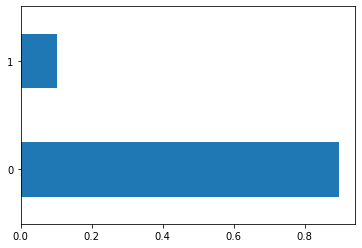

In [274]:
df_churn["Churn"].value_counts(normalize=True).plot.barh()
plt.show()

Target column has been derived but it seems like there is Data Imbalance in the dataset, this will be checked later on.

Lets drop all the _9 columns.

In [275]:
# Search using regular expression

df_churn.filter(regex="_9", axis=1).columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9',
       'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9',
       'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9',
       'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9',
       'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9',
       'sachet_2g_9', 'mon

In [276]:
# Also some columns have sep in it as well

df_churn.filter(regex="sep", axis=1).columns

Index(['sep_vbc_3g'], dtype='object')

In [277]:
# Lets Drop these columns as mentioned in the case study

cols_drop = df_churn.filter(regex="_9|sep", axis=1).columns.to_list()  # Search using regular expression
df_churn.drop(cols_drop, axis=1, inplace=True)

In [278]:
# Remaining Columns: 158

df_churn.shape

(99999, 161)

In [279]:
# Types of Columns
variable_count()

Numeric Variables:  152
Categorical Variables:  0
Datetime Variables:  9


In [280]:
df_churn.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0           2014-06-30           2014-07-31           2014-08-31  197.385   
1           2014-06-30           2014-07-31           2014-08-31   34.047   
2           2014-06-30           2014-07-31           2014-08-31  167.690   
3           2014-06-30           2014-07-31           2014-08-31  221.338   
4           2014-06-30           2014-07-31           2014-08-31  261.636   

    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0  214.816  213.803          NaN          NaN         0.00           NaN   
1  355.074  268.321        24.11        78.68         7.68         15.74   
2  189.058  210.226        11.54        55.24        37.26        143.33   
3  251.102  508.054        99.91        54.39       310.98        123.31   
4  309.876  238.174        50.31       149.44        83.89         76.96   

   offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           NaN          0.00            NaN            NaN           0.00   
1         99.84        304.76            0.0           0.00           0.00   
2        220.59        208.36            0.0           0.00           0.00   
3        109.01         71.68            0.0          54.86          44.38   
4         91.88        124.26            0.0           0.00           0.00   

   roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            NaN            NaN           0.00               NaN   
1            0.0           0.00           0.00             23.88   
2            0.0           0.00           0.00              7.19   
3            0.0          28.09          39.04             73.68   
4            0.0           0.00           0.00             50.31   

   loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               NaN              0.00               NaN               NaN   
1             74.56              7.68             11.51             75.94   
2             28.74             13.58             29.34             16.86   
3             34.81             10.61            107.43             83.21   
4            149.44             83.89             67.64             91.88   

   loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0              0.00               NaN               NaN              0.00   
1            291.86              0.00              0.00              0.00   
2             38.46             24.11             21.79             15.61   
3             22.46              1.91              0.65              4.91   
4            124.26              0.00              0.00              0.00   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0               NaN               NaN              0.00           NaN   
1               0.0              2.91              0.00         35.39   
2               0.0            135.54             45.76         60.66   
3               0.0              0.00              0.00        183.03   
4               0.0              0.00              0.00        117.96   

   loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           NaN          0.00               NaN               NaN   
1        150.51        299.54              0.23              4.11   
2         67.41         67.66              4.34             26.49   
3        118.68         37.99             26.23             14.89   
4        241.33        208.16              0.00              0.00   

   std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0              0.00               NaN               NaN              0.00   
1              0.00              0.00              0.46              0.13   
2             22.58             41.81             67.41             75.53   
3            289.58              2.99              1.73              6.53   
4              0.00              9.31  

### Identifying/Handling Missing Values

Now that we have removed few columns we can concentrate on identifying and handling the missing values.

Lets fetch this onto a list and then check for only where the bool value is true}

In [281]:
# Store the above result onto a list
cols_missing = df_churn.loc[:, df_churn.isna().any()].columns.to_list()

# Fetch the missing values using the cols_missing list
round(100 * (df_churn[cols_missing].isnull().sum(axis=0) / len(df_churn.index)),3)

last_date_of_month_7         0.601
last_date_of_month_8         1.100
onnet_mou_6                  3.937
onnet_mou_7                  3.859
onnet_mou_8                  5.378
offnet_mou_6                 3.937
offnet_mou_7                 3.859
offnet_mou_8                 5.378
roam_ic_mou_6                3.937
roam_ic_mou_7                3.859
roam_ic_mou_8                5.378
roam_og_mou_6                3.937
roam_og_mou_7                3.859
roam_og_mou_8                5.378
loc_og_t2t_mou_6             3.937
loc_og_t2t_mou_7             3.859
loc_og_t2t_mou_8             5.378
loc_og_t2m_mou_6             3.937
loc_og_t2m_mou_7             3.859
loc_og_t2m_mou_8             5.378
loc_og_t2f_mou_6             3.937
loc_og_t2f_mou_7             3.859
loc_og_t2f_mou_8             5.378
loc_og_t2c_mou_6             3.937
loc_og_t2c_mou_7             3.859
loc_og_t2c_mou_8             5.378
loc_og_mou_6                 3.937
loc_og_mou_7                 3.859
loc_og_mou_8        

Very High missing > 70%

`Observations`:
- **arpu_3g_* and arpu_2g_*:** In the case of 'arpu_3g_' and 'arpu_2g' variables, which record average revenue from internet services in a month, it is very possible that the null values are because the customer does not use the 2g or 3g services. If so, then this is a case of 'meaningiful missing values' and we can replace the nulls with 0 instead. Lets test our theory by taking sample records and columns.          

- **date_of_last_rech_data_*:** Here the columns have very high missing values and even if we try to impute it with Mode or any other advance iteration techniques like KNN Imputation. After imputation it might end up getting skewed to one category hence we should ideally drop this variable.           
    * NOTE: It might happen that customer has not done any recharge during the month hence the data is missing for it. So for now we will not delete it but will keep it for checking against the recharge columns. After comparision we might have better clarity if we want to delete them or not.               


Rest columns like total_rech_data_* or count_rech_3g_* etc. seem to have meaningful missing values hence we will explore them in detail later.

##### arpu_3g_* and arpu_2g_* 

In [282]:
df_churn.filter(regex="arpu_3g_|arpu_2g_", axis=1).columns.to_list()

['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']

In [283]:
# View records where 3G is NOT IN USE (i.e. vol_3g_mb_6 = 0) and NULL (arpu_3g_6isnull()) for Month 6
df_churn[(df_churn['vol_3g_mb_6'] == 0.00) & (df_churn['arpu_3g_6'].isnull())][['vol_3g_mb_6','arpu_3g_6']].head()

vol_3g_mb_6  arpu_3g_6
1          0.0        NaN
2          0.0        NaN
3          0.0        NaN
5          0.0        NaN
6          0.0        NaN

In [284]:
# View records where 2G is IN USE (i.e. vol_2g_mb_7 = 0) and NULL (arpu_2g_7.isnull()) for Month 7
df_churn[(df_churn['vol_2g_mb_7'] != 0.00) & (df_churn['arpu_2g_7'].isnull())][['vol_2g_mb_7','arpu_2g_7']].head()

Empty DataFrame
Columns: [vol_2g_mb_7, arpu_2g_7]
Index: []

As we can see that there is no datapoint where the 2g or 3g volume is Not 0 and the average revenue is NULL, this implies that the nulls are meaningful. We will now replace them with 0.

In [285]:
# Use For Loop to replace the null values
for i in df_churn.filter(regex = 'arpu_3g|arpu_2g').columns.to_list():
    df_churn[i] = df_churn[i].replace(np.NaN,0.00)

In [286]:
# Check if the null values got replaced

df_churn.filter(regex = 'arpu_3g|arpu_2g').isnull().sum()

arpu_3g_6    0
arpu_3g_7    0
arpu_3g_8    0
arpu_2g_6    0
arpu_2g_7    0
arpu_2g_8    0
dtype: int64

Let's check using describe() attribute if we can identify any other unique pattern or make some logical/business assumption and use it to impute the missing values.

In [287]:
df_churn[cols_missing].describe(include="all")

last_date_of_month_7 last_date_of_month_8   onnet_mou_6   onnet_mou_7  \
count                 99398                98899  96062.000000  96140.000000   
unique                    1                    1           NaN           NaN   
top     2014-07-31 00:00:00  2014-08-31 00:00:00           NaN           NaN   
freq                  99398                98899           NaN           NaN   
first   2014-07-31 00:00:00  2014-08-31 00:00:00           NaN           NaN   
last    2014-07-31 00:00:00  2014-08-31 00:00:00           NaN           NaN   
mean                    NaN                  NaN    132.395875    133.670805   
std                     NaN                  NaN    297.207406    308.794148   
min                     NaN                  NaN      0.000000      0.000000   
25%                     NaN                  NaN      7.380000      6.660000   
50%                     NaN                  NaN     34.310000     32.330000   
75%                     NaN                  NaN    118.740000    115.595000   
max                     NaN                  NaN   7376.710000   8157.780000   

         onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count   94621.000000  96062.000000  96140.000000  94621.000000   96062.000000   
unique           NaN           NaN           NaN           NaN            NaN   
top              NaN           NaN           NaN           NaN            NaN   
freq             NaN           NaN           NaN           NaN            NaN   
first            NaN           NaN           NaN           NaN            NaN   
last             NaN           NaN           NaN           NaN            NaN   
mean      133.018098    197.935577    197.045133    196.574803       9.950013   
std       308.951589    316.851613    325.862803    327.170662      72.825411   
min         0.000000      0.000000      0.000000      0.000000       0.000000   
25%         6.460000     34.730000     32.190000     31.630000       0.000000   
50%        32.360000     96.310000     91.735000     92.140000       0.000000   
75%       115.860000    231.860000    226.815000    228.260000       0.000000   
max     10752.560000   8362.360000   9667.130000  14007.340000   13724.380000   

        roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count    96140.000000   94621.000000   96062.000000   96140.000000   
unique            NaN            NaN            NaN            NaN   
top               NaN            NaN            NaN            NaN   
freq              NaN            NaN            NaN            NaN   
first             NaN            NaN            NaN            NaN   
last              NaN            NaN            NaN            NaN   
mean         7.149898       7.292981      13.911337       9.818732   
std         73.447948      68.402466      71.443196      58.455762   
min          0.000000       0.000000       0.000000       0.000000   
25%          0.000000       0.000000       0.000000       0.000000   
50%          0.000000       0.000000       0.000000       0.000000   
75%          0.000000       0.000000       0.000000       0.000000   
max      15371.040000   13095.360000    3775.110000    2812.040000   

        roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count    94621.000000      96062.000000      96140.000000      94621.000000   
unique            NaN               NaN               NaN               NaN   
top               NaN               NaN               NaN               NaN   
freq              NaN               NaN               NaN               NaN   
first             NaN               NaN               NaN               NaN   
last              NaN               NaN               NaN               NaN   
mean         9.971890         47.100763         46.473010         45.887806   
std         64.713221        150.856393        155.318705        151.184830   
min          0.000000          0.000000          0.000000  

Let refresh and see how many more features have missing values

In [288]:
cols_missing = df_churn.loc[:, df_churn.isna().any()].columns.to_list()

# Fetch the missing values using the cols_missing list
round(100 * (df_churn[cols_missing].isnull().sum(axis=0) / len(df_churn.index)),3)

last_date_of_month_7         0.601
last_date_of_month_8         1.100
onnet_mou_6                  3.937
onnet_mou_7                  3.859
onnet_mou_8                  5.378
offnet_mou_6                 3.937
offnet_mou_7                 3.859
offnet_mou_8                 5.378
roam_ic_mou_6                3.937
roam_ic_mou_7                3.859
roam_ic_mou_8                5.378
roam_og_mou_6                3.937
roam_og_mou_7                3.859
roam_og_mou_8                5.378
loc_og_t2t_mou_6             3.937
loc_og_t2t_mou_7             3.859
loc_og_t2t_mou_8             5.378
loc_og_t2m_mou_6             3.937
loc_og_t2m_mou_7             3.859
loc_og_t2m_mou_8             5.378
loc_og_t2f_mou_6             3.937
loc_og_t2f_mou_7             3.859
loc_og_t2f_mou_8             5.378
loc_og_t2c_mou_6             3.937
loc_og_t2c_mou_7             3.859
loc_og_t2c_mou_8             5.378
loc_og_mou_6                 3.937
loc_og_mou_7                 3.859
loc_og_mou_8        

Lets pick the variables and further evaluate the possibilities.

#### `onnet_mou_*`
##### Minutes of Usage for all kind of calls within the network
Here as per the Data Dictionary these columns represent Minutes of usage for all kind of calls within the same operator network so we can observe (refer next code snippet) that the value have a large range.             
Here NaN or missing value could mean that
- No call were made hence value is not present in which case we can impute with 0 if all other _mou_* value for this entry is also NaN or 0.
- Value was missing at random in which case we can opt for imputation using mean/median or advanced techniques like IterativeImputer or KNN Imputation.

In [289]:
# Lets check if total_ic_mou_6, isd_ic_mou_6 and total_og_mou_6 is also either 0 or NaN
# This will tell is that these entries are missing at random or meaningfull missing
# We will check this value only for the NaN entries to verify what is there in other columns if this column has NaN value

df_churn[df_churn["onnet_mou_6"].isna()][["total_ic_mou_6","isd_ic_mou_6","total_og_mou_6"]].head()

total_ic_mou_6  isd_ic_mou_6  total_og_mou_6
0              0.0           NaN             0.0
15             0.0           NaN             0.0
26             0.0           NaN             0.0
37             0.0           NaN             0.0
51             0.0           NaN             0.0

So as per the observation from the above we can see that the data is not missing at random but it is a case of meaningful missing. 

Lets check how much missing data or 0 is there and how much match the above criteria.

In [290]:
# Checking onnet_mou_6 with respect to "total_ic_mou_6","isd_ic_mou_6","total_og_mou_6" if they also have same number of missing

onnet_mou = df_churn[df_churn["onnet_mou_6"].isna()][["total_ic_mou_6","isd_ic_mou_6","total_og_mou_6"]]

print("Total Missing in Column:", df_churn["onnet_mou_6"].isnull().sum(axis=0))
print("Missing in Column with respect to total_ic_mou_6, isd_ic_mou_6 & total_og_mou_6:", len(onnet_mou.index))
print(onnet_mou.describe())

Total Missing in Column: 3937
Missing in Column with respect to total_ic_mou_6, isd_ic_mou_6 & total_og_mou_6: 3937
       total_ic_mou_6  isd_ic_mou_6  total_og_mou_6
count          3937.0           0.0          3937.0
mean              0.0           NaN             0.0
std               0.0           NaN             0.0
min               0.0           NaN             0.0
25%               0.0           NaN             0.0
50%               0.0           NaN             0.0
75%               0.0           NaN             0.0
max               0.0           NaN             0.0


So we can check that the Distribution of the values in 
- total_ic_mou_6 & total_og_mou_6 is 0 i.e. min and max is 0
- isd_ic_mou_6 has all NaN values

hence we can say that since these values are 0 this means that there were no calls that were made in the month as Total incoming and outgoing calls are 0 due to this we can impute onnet_mou_6 with 0.

Lets also check for _7 and _8 as well,

In [291]:
onnet_mou_7 = df_churn[df_churn["onnet_mou_7"].isna()][["total_ic_mou_7","isd_ic_mou_7","total_og_mou_7"]]
onnet_mou_8 = df_churn[df_churn["onnet_mou_8"].isna()][["total_ic_mou_8","isd_ic_mou_8","total_og_mou_8"]]

print("Total Missing in onnet_mou_7:", df_churn["onnet_mou_7"].isnull().sum(axis=0))
print(onnet_mou_7.describe())
print("Total Missing in onnet_mou_8:", df_churn["onnet_mou_8"].isnull().sum(axis=0))
print(onnet_mou_8.describe())

Total Missing in onnet_mou_7: 3859
       total_ic_mou_7  isd_ic_mou_7  total_og_mou_7
count          3859.0           0.0          3859.0
mean              0.0           NaN             0.0
std               0.0           NaN             0.0
min               0.0           NaN             0.0
25%               0.0           NaN             0.0
50%               0.0           NaN             0.0
75%               0.0           NaN             0.0
max               0.0           NaN             0.0
Total Missing in onnet_mou_8: 5378
       total_ic_mou_8  isd_ic_mou_8  total_og_mou_8
count          5378.0           0.0          5378.0
mean              0.0           NaN             0.0
std               0.0           NaN             0.0
min               0.0           NaN             0.0
25%               0.0           NaN             0.0
50%               0.0           NaN             0.0
75%               0.0           NaN             0.0
max               0.0           NaN           

Over here also we can see that 
- total_ic_mou_6 & total_og_mou_6 is 0 i.e. min and max is 0
- isd_ic_mou_6 has all NaN values

for both _7 and _8, hence we can confirm that we can impute the values of onnet_mou_6, onnet_mou_7 & onnet_mou_8 can be imputed with 0.

In [292]:
# Replacing NaN with 0 in onnet_mou_*
for col in df_churn.filter(regex="onnet_mou_", axis=1).columns.to_list():
    df_churn[col].fillna(0, inplace=True)

In [293]:
# No Null values in the columns now

df_churn[df_churn.filter(regex="onnet_mou_", axis=1).columns.to_list()].isnull().sum(axis=0)

onnet_mou_6    0
onnet_mou_7    0
onnet_mou_8    0
dtype: int64

In [294]:
# Lets generalize this process using method
def check_mou_fields(val):
    '''
    Input contains the string for which missing value imputation decision needs to be taken
    eg. val = "onnet_mou_"
    This method will print the values for total_ic_mou_*, isd_ic_mou_* & total_og_mou_* so that the decision can be taken
    if variable needs to be imputed with 0 or some advanced Imputation technique needs to be used    
    '''
    for i in ['6','7','8']:
        val_mou = df_churn[df_churn[val+i].isna()][["total_ic_mou_"+i,"isd_ic_mou_"+i,"total_og_mou_"+i]]
        print("Total Missing in "+val+i+":", df_churn[val+i].isnull().sum(axis=0))
        print(val_mou.describe(),"\n")

#### `offnet_mou_*`           
##### Minutes of usage for all kinds of calls outside the operators telecom network
Similar to onnet_mou_* represent minutes of usage - Voice calls outside the operator network, it is highly probable that these are meaningful missing and hence can be imputed with 0.

In [295]:
# Lets check how these columns are distributed with respect to total_ic_mou_*, isd_ic_mou_* & total_og_mou_*

check_mou_fields("offnet_mou_")

Total Missing in offnet_mou_6: 3937
       total_ic_mou_6  isd_ic_mou_6  total_og_mou_6
count          3937.0           0.0          3937.0
mean              0.0           NaN             0.0
std               0.0           NaN             0.0
min               0.0           NaN             0.0
25%               0.0           NaN             0.0
50%               0.0           NaN             0.0
75%               0.0           NaN             0.0
max               0.0           NaN             0.0 

Total Missing in offnet_mou_7: 3859
       total_ic_mou_7  isd_ic_mou_7  total_og_mou_7
count          3859.0           0.0          3859.0
mean              0.0           NaN             0.0
std               0.0           NaN             0.0
min               0.0           NaN             0.0
25%               0.0           NaN             0.0
50%               0.0           NaN             0.0
75%               0.0           NaN             0.0
max               0.0           NaN       

Again similar to onnet_mou_*, here also the distribution seems to indicate that the missing values are meaningful missing and hence we can impute missing values with 0.

**NOTE**: Lets create a variable called cols_impute_0 and add these columns into that. Once we have checked all the columns for missing values we will impute these columns with 0.

In [296]:
cols_impute_0 = []
cols_impute_0.extend(df_churn.filter(regex="offnet_mou_", axis=1).columns.to_list())

# we will continue to add columns into the cols_impute_0 column.

A second look at the high null values shows us a pattern. 

All of these columns collect information that relates to a customer's data usage or using a service which requires data. We can see that the **percentage of nulls match exactly across corresponding months.** Let's take a quick look at some columns to randomly confirm this conclusion. 

In [297]:
# View records where 3G is IN USE vs NOT IN USE and nulls are available in night_pck_user - for Month 6

print("3G In Use: \n")
print(df_churn[(df_churn['vol_3g_mb_6'] == 0.00) & (df_churn['night_pck_user_6'] == 0)][['vol_3g_mb_6','night_pck_user_6']].head(), '\n')
print("3G Not In Use: \n")
print(df_churn[(df_churn['vol_3g_mb_6'] != 0.00) & (df_churn['night_pck_user_6'] == 0)][['vol_3g_mb_6','night_pck_user_6']].head())

3G In Use: 

    vol_3g_mb_6  night_pck_user_6
4           0.0               0.0
19          0.0               0.0
32          0.0               0.0
39          0.0               0.0
52          0.0               0.0 

3G Not In Use: 

    vol_3g_mb_6  night_pck_user_6
0         83.57               0.0
44       668.19               0.0
47       634.34               0.0
56      1530.46               0.0
57      3144.97               0.0


In [298]:
# View records where 3G is IN USE vs NOT IN USE and nulls are available in night_pck_user - for Month 6

print("3G In Use: \n")
print(df_churn[(df_churn['vol_3g_mb_6'] == 0.00) & (df_churn['night_pck_user_6'].isnull())][['vol_3g_mb_6','night_pck_user_6']].head(), '\n')
print("3G Not In Use: \n")
print(df_churn[(df_churn['vol_3g_mb_6'] != 0.00) & (df_churn['night_pck_user_6'].isnull())][['vol_3g_mb_6','night_pck_user_6']].head())

3G In Use: 

   vol_3g_mb_6  night_pck_user_6
1          0.0               NaN
2          0.0               NaN
3          0.0               NaN
5          0.0               NaN
6          0.0               NaN 

3G Not In Use: 

Empty DataFrame
Columns: [vol_3g_mb_6, night_pck_user_6]
Index: []


In [299]:
# View records where 2G is IN USE vs NOT IN USE and nulls are available in fb_user - for Month 7

print("2G In Use: \n")
print(df_churn[(df_churn['vol_2g_mb_7'] == 0.00) & (df_churn['fb_user_7'].isnull())][['vol_2g_mb_7','fb_user_7']].head(), '\n')
print("2G Not In Use: \n")
print(df_churn[(df_churn['vol_2g_mb_7'] != 0.00) & (df_churn['fb_user_7'].isnull())][['vol_2g_mb_7','fb_user_7']].head())

2G In Use: 

   vol_2g_mb_7  fb_user_7
2          0.0        NaN
3          0.0        NaN
4          0.0        NaN
5          0.0        NaN
6          0.0        NaN 

2G Not In Use: 

Empty DataFrame
Columns: [vol_2g_mb_7, fb_user_7]
Index: []


In [300]:
cols_impute_0.extend(['std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8',
                      'std_og_t2m_mou_6','std_og_t2m_mou_7','std_og_t2m_mou_8',
                      'std_og_t2f_mou_6','std_og_t2f_mou_7','std_og_t2f_mou_8',
                      'std_og_mou_6','std_og_mou_7','std_og_mou_8',
                      'isd_og_mou_6','isd_og_mou_7','isd_og_mou_8',
                      'spl_og_mou_6','spl_og_mou_7','spl_og_mou_8',
                      'og_others_6','og_others_7','og_others_8',
                      'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8',
                      'loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8',
                      'loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8',
                      'loc_ic_mou_6','loc_ic_mou_7','loc_ic_mou_8',
                      'std_ic_t2t_mou_6','std_ic_t2t_mou_7','std_ic_t2t_mou_8',
                      'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8',
                      'std_ic_t2f_mou_6','std_ic_t2f_mou_7','std_ic_t2f_mou_8',
                      'std_ic_mou_6','std_ic_mou_7','std_ic_mou_8',
                      'spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8',
                      'isd_ic_mou_6','isd_ic_mou_7','isd_ic_mou_8',
                      'ic_others_6','ic_others_7','ic_others_8'])

cols_impute_0.extend(df_churn.filter(regex="roam_ic_mou_|roam_og_mou_|loc_og_t2t_mou_|loc_og_t2m_mou_|loc_og_t2f_mou_|loc_og_t2c_mou_|loc_og_mou_").columns.to_list())

#### `date_of_last_rech_*`

In [301]:
# Lets check how many missing values are there in the columns
df_churn[df_churn.filter(regex="date_of_last_rech_", axis=1).columns.to_list()].isnull().sum(axis=0)

date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
dtype: int64

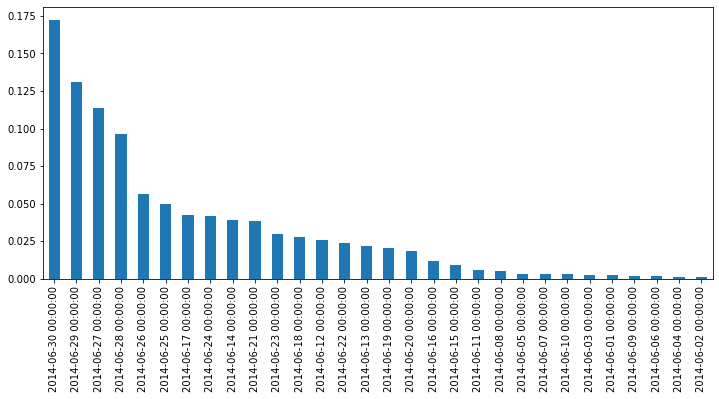

In [302]:
# Lets check the value distribution in the column

plt.figure(figsize=(12,5))
df_churn["date_of_last_rech_6"].value_counts(normalize=True).plot.bar()
plt.show()

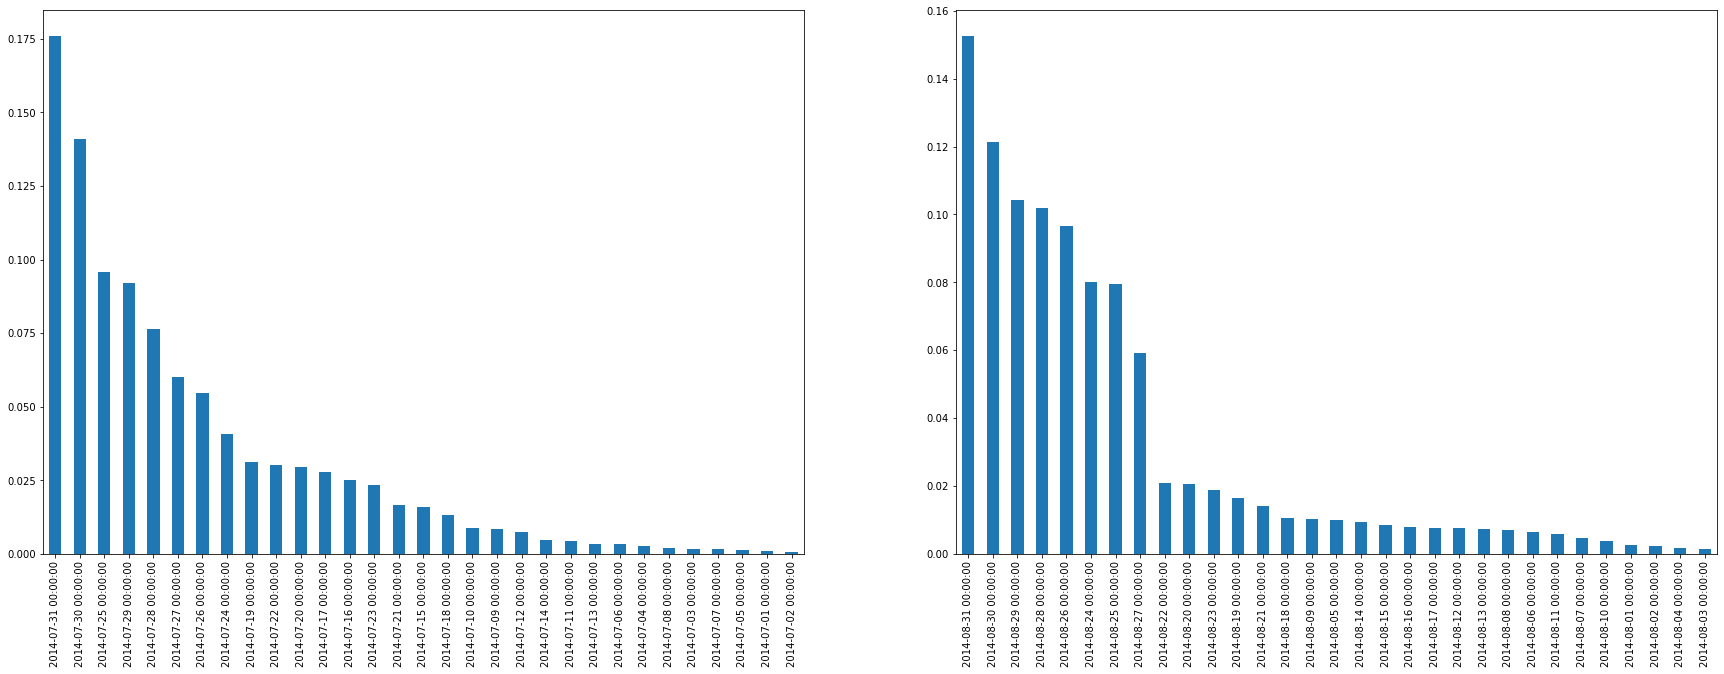

In [303]:
# Similarily lets check the value distribution for 7th and 8th Months as well

plt.figure(figsize=(30,10))

plt.subplot(1,2,1)
df_churn["date_of_last_rech_7"].value_counts(normalize=True).plot.bar()

plt.subplot(1,2,2)
df_churn["date_of_last_rech_8"].value_counts(normalize=True).plot.bar()

plt.show()

We can see that the distribution is fairly normal hence we can impute these values with Mode.

Before imputation of these columns lets check remaining columns as well just incase we get some information from the missing Data columns.

#### Recharge Columns

These are the columns which provide information for Rechange in general Data related recharges like total_rech_data_* or count_rech_3g_*. Lets see what are the inferences we can make from these columns.

In [304]:
# Lets put these recharge columns onto cols_rech list

cols_rech = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 
             'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
             'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
             'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
             'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8']

df_churn[cols_rech].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  count_rech_3g_6  \
count     25153.000000     25571.000000     26339.000000     25153.000000   
mean          1.864668         2.044699         2.016288         0.599133   
std           2.570254         2.768332         2.720132         1.274428   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         1.000000         1.000000         0.000000   
50%           1.000000         1.000000         1.000000         0.000000   
75%           2.000000         2.000000         2.000000         1.000000   
max          42.000000        48.000000        44.000000        29.000000   

       count_rech_3g_7  count_rech_3g_8  max_rech_data_6  max_rech_data_7  \
count     25571.000000     26339.000000     25153.000000     25571.000000   
mean          0.621720         0.635711       126.393392       126.729459   
std           1.394524         1.422827       108.477235       109.765267   
min           0.000000         0.000000         1.000000         1.000000   
25%           0.000000         0.000000        25.000000        25.000000   
50%           0.000000         0.000000       145.000000       145.000000   
75%           1.000000         1.000000       177.000000       177.000000   
max          35.000000        45.000000      1555.000000      1555.000000   

       max_rech_data_8  av_rech_amt_data_6  av_rech_amt_data_7  \
count     26339.000000        25153.000000        25571.000000   
mean        125.717301          192.600982          200.981292   
std         109.437851          192.646318          196.791224   
min           1.000000            1.000000            0.500000   
25%          25.000000           82.000000           92.000000   
50%         145.000000          154.000000          154.000000   
75%         179.000000          252.000000          252.000000   
max        1555.000000         7546.000000         4365.000000   

       av_rech_amt_data_8  
count        26339.000000  
mean           197.526489  
std            191.301305  
min              0.500000  
25%             87.000000  
50%            154.000000  
75%            252.000000  
max           4076.000000

We can observe that some of the columns have minimum value as 1 where as some don't.            
It might be possible that these are meaningful missing considering that the customer did not recharge data for the months, hence the correct value should be 0 in place of NaN.

To verify this lets check each Data column against the Date Column, 
- incase both the columns have NaN values then this implies that customer did not recharge,
- incase date field is not empty but Data field is -> this would imply data is missing at random and should be imputed with appropriate method.

In [305]:
# Lets start with checking values where both Date and Data columns are empty
# Starting with total_rech_data_6

df_churn.loc[df_churn["total_rech_data_6"].isnull() & df_churn["date_of_last_rech_data_6"].isnull(), 
            ["total_rech_data_6", "date_of_last_rech_data_6"]].head()

total_rech_data_6 date_of_last_rech_data_6
1                NaN                      NaT
2                NaN                      NaT
3                NaN                      NaT
5                NaN                      NaT
6                NaN                      NaT

Now lets compare the total number of missing in both the columns if they are equal then it means that             
there are missing values in total_rech_data_6 only if customer made no recharge in date_of_last_rech_data_6

In [306]:
print("Total Missing in date_of_last_rech_data_6:", df_churn["date_of_last_rech_data_6"].isnull().sum())
print("Total Missing in total_rech_data_6:", df_churn["total_rech_data_6"].isnull().sum())
print("Total Missing in combination:", len(df_churn.loc[df_churn["total_rech_data_6"].isnull() & df_churn["date_of_last_rech_data_6"].isnull(), 
            ["total_rech_data_6", "date_of_last_rech_data_6"]].index))

Total Missing in date_of_last_rech_data_6: 74846
Total Missing in total_rech_data_6: 74846
Total Missing in combination: 74846


We can observe that there are excatly the same number of missing in both the columns hence we can say that if the customer made no rechange in the month then these columns are empty. Hence we can logically impute total_rech_data_6 with 0.

Lets do the same for another column i.e. total_rech_data_7.

In [307]:
# total_rech_data_7

print("Total Missing in date_of_last_rech_data_7:", df_churn["date_of_last_rech_data_7"].isnull().sum())
print("Total Missing in total_rech_data_7:", df_churn["total_rech_data_7"].isnull().sum())
print("Total Missing in combination:", len(df_churn.loc[df_churn["total_rech_data_7"].isnull() & df_churn["date_of_last_rech_data_7"].isnull(), 
            ["total_rech_data_7", "date_of_last_rech_data_7"]].index))

Total Missing in date_of_last_rech_data_7: 74428
Total Missing in total_rech_data_7: 74428
Total Missing in combination: 74428


So over here also the result is the same, hence we will impute this with 0 as well.

Lets generalize the above process for all the Data columns.

In [308]:
# check the above process for remaining cols_rech columns
for col in cols_rech[2:]:
    print(col, end=" -> ")
    missing_in_col = df_churn[col].isnull().sum()
    missing_in_date_col = df_churn["date_of_last_rech_data_"+col[-1]].isnull().sum()
    missing_in_combo = len(df_churn.loc[df_churn[col].isnull() & df_churn["date_of_last_rech_data_"+col[-1]].isnull(), 
            [col, "date_of_last_rech_data_"+col[-1]]].index)
    if missing_in_col == missing_in_date_col == missing_in_combo:
        print("Same amount of missing. Can be imputed with 0.")
    else:
        print("Further evaluate this combination.")

total_rech_data_8 -> Same amount of missing. Can be imputed with 0.
count_rech_2g_6 -> Same amount of missing. Can be imputed with 0.
count_rech_2g_7 -> Same amount of missing. Can be imputed with 0.
count_rech_2g_8 -> Same amount of missing. Can be imputed with 0.
count_rech_3g_6 -> Same amount of missing. Can be imputed with 0.
count_rech_3g_7 -> Same amount of missing. Can be imputed with 0.
count_rech_3g_8 -> Same amount of missing. Can be imputed with 0.
max_rech_data_6 -> Same amount of missing. Can be imputed with 0.
max_rech_data_7 -> Same amount of missing. Can be imputed with 0.
max_rech_data_8 -> Same amount of missing. Can be imputed with 0.
av_rech_amt_data_6 -> Same amount of missing. Can be imputed with 0.
av_rech_amt_data_7 -> Same amount of missing. Can be imputed with 0.
av_rech_amt_data_8 -> Same amount of missing. Can be imputed with 0.


Now since all the columns satisfy this condition lets add them to the cols_impute_0 list and impute all the missing values as well.

#### Imputing cols_impute_0 fields

In [309]:
# Adding all the Date fields
cols_impute_0.extend(cols_rech)

# Imputing these fields with 0
for col in cols_impute_0:
    df_churn[col].fillna(0, inplace=True)

Now lets impute the Date Columns

**date_of_last_rech_**                             
These columns can be used to derive variables that calculate 'days since last recharge' (Refer Derived Variables Section later on). To enable that, we will carry out the following steps for imputation:-

* Mode Imputation for 'date_of_last_rech_6'
* If null value in 'date_of_last_rech_7', then replace with last date from 'date_of_last_rech_6'
* If null value in 'date_of_last_rech_8', then replace with last date from 'date_of_last_rech_7'

In [310]:
date_mode = df_churn["date_of_last_rech_6"].mode()
df_churn["date_of_last_rech_6"].fillna(date_mode[0], inplace=True)

In [311]:
# View Sample data prior to imputation for Month 7
df_churn[df_churn['date_of_last_rech_7'].isnull()][['date_of_last_rech_6','date_of_last_rech_7']].head()

date_of_last_rech_6 date_of_last_rech_7
52           2014-06-19                 NaT
68           2014-06-14                 NaT
121          2014-06-23                 NaT
130          2014-06-25                 NaT
144          2014-06-21                 NaT

In [312]:
# Replace Month 7 nulls with recharge date from previous month
df_churn['date_of_last_rech_7'].fillna(df_churn['date_of_last_rech_6'], inplace = True)

In [313]:
# View Sample data post imputation for Month 7
df_churn.iloc[[52,68,121,130,144]][['date_of_last_rech_6','date_of_last_rech_7']].head()

date_of_last_rech_6 date_of_last_rech_7
52           2014-06-19          2014-06-19
68           2014-06-14          2014-06-14
121          2014-06-23          2014-06-23
130          2014-06-25          2014-06-25
144          2014-06-21          2014-06-21

In [314]:
# Similarly, replace Month 8 nulls with recharge date from previous month
df_churn['date_of_last_rech_8'].fillna(df_churn['date_of_last_rech_7'], inplace = True)

**last_date_of_month_**

Let's check the significance of these columns before considering imputation or dropping them. Starting with the 'last_date_of_month_' family.

In [315]:
# Check basic properties of the 'last_date_of_month_' column
df_churn.filter(regex = 'last_date_of_month_').describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8
count                 99999                99398                98899
unique                    1                    1                    1
top     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
freq                  99999                99398                98899
first   2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
last    2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00

We can see that this family of columns have only one unique entry which is not helpful even with any form of imputation. Hence, we can drop this whole family, including 'last_date_of_month_6' which has no nulls. However, we will save these columns for now to make use of them for some quick calculations to create derived variables at a later point. We will impute using mode for this purpose.

In [316]:
# Lets do it for 7th and 8th Month as well
date_mode = df_churn["last_date_of_month_7"].mode()
df_churn["last_date_of_month_7"].fillna(date_mode[0], inplace=True)

date_mode = df_churn["last_date_of_month_8"].mode()
df_churn["last_date_of_month_8"].fillna(date_mode[0], inplace=True)

In [317]:
# Lets check if Null values were imputed or not
df_churn[df_churn.filter(regex="date_", axis=1).columns.to_list()].isnull().sum(axis=0)

last_date_of_month_6            0
last_date_of_month_7            0
last_date_of_month_8            0
date_of_last_rech_6             0
date_of_last_rech_7             0
date_of_last_rech_8             0
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
dtype: int64

The remaining date columns date_of_last_rech_data_*, do not hold any business information as such since they have very high missing values, hence we will now drop them.

In [318]:
# Dropping date_of_last_rech_data_*

df_churn.drop(["date_of_last_rech_data_6", "date_of_last_rech_data_7", "date_of_last_rech_data_8"], axis=1, inplace=True)

#### Possible Categorical Columns

Now that we have handled most of the missing data columns we are left with night_pck_user_* and fb_user_*.              
As per the data dictionary
- night_pck_user_*: Prepaid service schemes for Night Packs
- fb_user_*: Service scheme to avail services of Facebook and similar social networking sites

Lets check the value distribution for both these columns

In [319]:
df_churn[["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]].describe()

night_pck_user_6  night_pck_user_7  night_pck_user_8     fb_user_6  \
count      25153.000000      25571.000000      26339.000000  25153.000000   
mean           0.025086          0.023034          0.020844      0.914404   
std            0.156391          0.150014          0.142863      0.279772   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000          0.000000      1.000000   
50%            0.000000          0.000000          0.000000      1.000000   
75%            0.000000          0.000000          0.000000      1.000000   
max            1.000000          1.000000          1.000000      1.000000   

          fb_user_7     fb_user_8  
count  25571.000000  26339.000000  
mean       0.908764      0.890808  
std        0.287950      0.311885  
min        0.000000      0.000000  
25%        1.000000      1.000000  
50%        1.000000      1.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

We can observe that there are in general 2 values 0 or 1.

Now if we consider these columns then we can say (considering the business logic)
- 1 -> would represent customer who are actively using the service packs
- 0 -> would represent customer who have opted for the service packs but have not activated them

So we will impute these columns with 0

In [320]:
# Replacing the NaN values with -1 for the above mentioned columns

for col in ["night_pck_user_6","night_pck_user_7","night_pck_user_8","fb_user_6","fb_user_7","fb_user_8"]:
    df_churn[col].fillna(0, inplace=True)

In [321]:
# Method to display column Value dispribution
def display_value_counts(col_val):
    global df_churn
    for col in df_churn.filter(regex=col_val).columns.to_list():
        print(df_churn[col].value_counts(normalize=True))
        print()

In [322]:
# night_pck_user_*
display_value_counts("night_pck_user_")

0.0    0.99369
1.0    0.00631
Name: night_pck_user_6, dtype: float64

0.0    0.99411
1.0    0.00589
Name: night_pck_user_7, dtype: float64

0.0    0.99451
1.0    0.00549
Name: night_pck_user_8, dtype: float64



night_pck_user_ is highly skewd hence we will drop this column.

In [323]:
df_churn.drop(["night_pck_user_6","night_pck_user_7","night_pck_user_8"], axis=1, inplace=True)

In [324]:
# Let's check fb_user_*
display_value_counts("fb_user_")

0.0    0.769998
1.0    0.230002
Name: fb_user_6, dtype: float64

0.0    0.767618
1.0    0.232382
Name: fb_user_7, dtype: float64

0.0    0.765368
1.0    0.234632
Name: fb_user_8, dtype: float64



Again this fb_user_* columns are also highly skewed after imputation hence we will remove them as well.

In [325]:
df_churn.drop(["fb_user_6","fb_user_7","fb_user_8"], axis=1, inplace=True)

Now that we have checked all the missing value columns we shall reconfirm that all the missing values have been handled from the df_churn dataset.

In [326]:
df_churn.isnull().any()

last_date_of_month_6    False
last_date_of_month_7    False
last_date_of_month_8    False
arpu_6                  False
arpu_7                  False
arpu_8                  False
onnet_mou_6             False
onnet_mou_7             False
onnet_mou_8             False
offnet_mou_6            False
offnet_mou_7            False
offnet_mou_8            False
roam_ic_mou_6           False
roam_ic_mou_7           False
roam_ic_mou_8           False
roam_og_mou_6           False
roam_og_mou_7           False
roam_og_mou_8           False
loc_og_t2t_mou_6        False
loc_og_t2t_mou_7        False
loc_og_t2t_mou_8        False
loc_og_t2m_mou_6        False
loc_og_t2m_mou_7        False
loc_og_t2m_mou_8        False
loc_og_t2f_mou_6        False
loc_og_t2f_mou_7        False
loc_og_t2f_mou_8        False
loc_og_t2c_mou_6        False
loc_og_t2c_mou_7        False
loc_og_t2c_mou_8        False
loc_og_mou_6            False
loc_og_mou_7            False
loc_og_mou_8            False
std_og_t2t

Lets also check ARPU or Average Revenue per user columns

As per the initial distribution of these columns, there seems to be some values with negatives.              
Now as per the case study we have to work for the customers who are prepaid users, a user is said to be prepaid if the user pays 1st for any service be it voice related or data related to the Telecom company prior to that service getting activated. 

This means customer has already paid for the service it used and it also does not make sense for it to be a balancing issue from previous months like it is incase of Postpaid users where if they paid more 1 month it gets balanced out as -ve in subsequent months. Since a prepaid user has to pay for any service hence the possibility of a user with -ve arpu implies that there is some amount due from customer which is highly improbable due to the nature of this service.

Lets check how many such customers are there

In [327]:
df_churn.filter(regex="arpu").columns.to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [328]:
df_churn[['arpu_6', 'arpu_7', 'arpu_8']].quantile([0.001, 0.0025, 0.003, 0.004, 0.0045])

arpu_6     arpu_7    arpu_8
0.0010 -14.2622 -15.601072 -5.416064
0.0025  -5.0000  -5.000000 -5.000000
0.0030  -3.0000  -5.000000 -5.000000
0.0040  -0.2500  -1.280192 -1.000000
0.0045   0.0000  -0.500000 -0.500000

So approx. 0.45% of the users in the dataset have such Data inconsistencies. Now we can make the assumption that this is possibily due to some promotional offer which they availed and hence it is coming as -ve but such information is not provided to us in case study or Data Dictionary.

Hence we will treat these -ve values as Data inconsistency as for prepaid customer -ve revenue does not make sense

In [329]:
df_churn['arpu_6'] = df_churn['arpu_6'].apply(lambda x: 0 if x < 0 else x)
df_churn['arpu_7'] = df_churn['arpu_7'].apply(lambda x: 0 if x < 0 else x)
df_churn['arpu_8'] = df_churn['arpu_8'].apply(lambda x: 0 if x < 0 else x)

In [330]:
df_churn[['arpu_6', 'arpu_7', 'arpu_8']].quantile([0.001, 0.0025, 0.003, 0.004, 0.0045])

arpu_6  arpu_7  arpu_8
0.0010     0.0     0.0     0.0
0.0025     0.0     0.0     0.0
0.0030     0.0     0.0     0.0
0.0040     0.0     0.0     0.0
0.0045     0.0     0.0     0.0

#### High Value Customers

As mentioned in the case study, we need to predict churn only for the high-value customers. These High value customers or HVCs are defined as those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

Average recharge amount comprises of call recharge amount and data recharge amount for month 6 and 7.

In [331]:
# Creating total data recharge amount for month 6 & 7
# Formula eg.: total_data_rech_amt_6 = total_rech_data_6 * av_rech_amt_data_6

df_churn["total_data_rech_amt_6"] = df_churn["total_rech_data_6"] * df_churn["av_rech_amt_data_6"]
df_churn["total_data_rech_amt_7"] = df_churn["total_rech_data_7"] * df_churn["av_rech_amt_data_7"]

In [332]:
# Now as mentioned to calculate the average Recharge Amount we need both Data and Call recharge amounts
# We had the total_rech_amt_6 and we have calculated the data_rech_amt now
# Now lets merge these 2

df_churn["total_amt_6"] = df_churn["total_data_rech_amt_6"] + df_churn["total_rech_amt_6"]
df_churn["total_amt_7"] = df_churn["total_data_rech_amt_7"] + df_churn["total_rech_amt_7"]

In [333]:
# Lets calculate the average amount for both 6 & 7th Months

df_churn["avg_rech_amt_6_7"] = (df_churn["total_amt_6"] + df_churn["total_amt_7"]) / 2

In [334]:
# Let's find the 70th Percentile

df_churn["avg_rech_amt_6_7"].quantile(0.7)

478.0

In [335]:
# Using the above value lets filter the data into HVC customers
# Filter and saving in the new DataFrame called df_hvc

hvc_threshold_value = df_churn["avg_rech_amt_6_7"].quantile(0.7)
df_hvc = df_churn.loc[ df_churn["avg_rech_amt_6_7"] >= hvc_threshold_value, : ].copy()
df_hvc.head()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8    arpu_6  \
0            2014-06-30           2014-07-31           2014-08-31   197.385   
7            2014-06-30           2014-07-31           2014-08-31  1069.180   
8            2014-06-30           2014-07-31           2014-08-31   378.721   
21           2014-06-30           2014-07-31           2014-08-31   514.453   
23           2014-06-30           2014-07-31           2014-08-31    74.350   

      arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  \
0    214.816   213.803         0.00         0.00         0.00          0.00   
7   1349.850  3171.480        57.84        54.68        52.29        453.43   
8    492.223   137.362       413.69       351.03        35.08         94.66   
21   597.753   637.760       102.41       132.11        85.14        757.93   
23   193.897   366.966        48.96        50.66        33.58         85.41   

    offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0           0.00          0.00           0.00           0.00           0.00   
7         567.16        325.91          16.23          33.49          31.64   
8          80.63        136.48           0.00           0.00           0.00   
21        896.68        983.39           0.00           0.00           0.00   
23         89.36        205.89           0.00           0.00           0.00   

    roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  \
0            0.00           0.00           0.00              0.00   
7           23.74          12.59          38.06             51.39   
8            0.00           0.00           0.00            297.13   
21           0.00           0.00           0.00              4.48   
23           0.00           0.00           0.00             48.96   

    loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              31.38             40.28            308.63            447.38   
8             217.59             12.49             80.96             70.58   
21              6.16             23.34             91.81             87.93   
23             50.66             33.58             82.94             83.01   

    loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7             162.28             62.13             55.14             53.23   
8              50.54              0.00              0.00              0.00   
21            104.81              0.75              0.00              1.58   
23            148.56              0.00              0.00              0.00   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  \
0                0.0               0.0              0.00          0.00   
7                0.0               0.0              0.00        422.16   
8                0.0               0.0              7.15        378.09   
21               0.0               0.0              0.00         97.04   
23               0.0               0.0             17.71        131.91   

    loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  \
0           0.00          0.00              0.00              0.00   
7         533.91        255.79              4.30             23.29   
8         288.18         63.04            116.56            133.43   
21         94.09        129.74             97.93            125.94   
23        133.68        182.14              0.00              0.00   

    std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  \
0               0.00              0.00              0.00              0.00   
7              12.01             49.89             31.76             49.14   
8              22.58             13.69             10.04             75.69   
21             61.79            665.36         

In [336]:
# Lets check how many rows are retained after this

df_hvc.shape

(30001, 157)

As mentioned in the case study that after handling the HVCs from the original dataset we should be left with around 29.9k rows and as we can observe we have a very close value to 29.9k rows.

Hence we can say that we got the correct amount.

In [337]:
# NOTE: In the case study it mentioned that HVCs are those which are more than or equal to the 70th percentile
# If we just choose more than 70th percentile then we do get exactly 29.9k rows
# but the it does not satisfy the filter criteria mentioned in the case study

df_churn.loc[ df_churn["avg_rech_amt_6_7"] > hvc_threshold_value, : ].shape

(29953, 157)

In [338]:
# Now lets drop these newly created columns

df_hvc.drop(['total_data_rech_amt_6','total_data_rech_amt_7', "total_amt_6", "total_amt_7", "avg_rech_amt_6_7"], 
            axis=1, inplace=True)

##### Churn Variable

Before moving onto other steps of Data Understanding, lets now check how much has the distribution of the Churn (which we calculated previously) changed.

In [339]:
df_hvc["Churn"].value_counts()

0    27560
1     2441
Name: Churn, dtype: int64

In [340]:
df_hvc["Churn"].value_counts(normalize=True)*100

0    91.863605
1     8.136395
Name: Churn, dtype: float64

We can observe that there is clear Data Imbalance issue within the Churn Columns. This will be tackled at a later stage.

#### Creating Derived Variables

Lets create some meaningful variables that can be helpful in deriving additional values from the existing columns.

**Age on Network**

In [341]:
# Currently given in days, lets convert the same into years so that it is easier to understand
# Assumption: To reduce complexity we will divide the aon variable with 365 assuming that 1 year equals 365 days

df_hvc["aon"] = round(df_hvc["aon"] / 365,3)
df_hvc["aon"].head()

0     2.652
7     2.197
8     0.863
21    1.973
23    1.655
Name: aon, dtype: float64

**days_since_last_rech_**

we will derive 'days since last recharge' for each month for the following columns. The idea is to understand how active the customer has been in terms of topping up required services.
- date_of_last_rech_6
- date_of_last_rech_7
- date_of_last_rech_8

This is where we will make use of the 'last_date_of_month_' family of columns prior to dropping them from the table.

In [342]:
# Last Recharge Date columns
df_hvc.filter(regex = 'date_of_last_rech_').describe()

date_of_last_rech_6  date_of_last_rech_7  date_of_last_rech_8
count                 30001                30001                30001
unique                   30                   53                   83
top     2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00
freq                   8449                 7610                 6200
first   2014-06-01 00:00:00  2014-06-07 00:00:00  2014-06-07 00:00:00
last    2014-06-30 00:00:00  2014-07-31 00:00:00  2014-08-31 00:00:00

In [343]:
df_hvc['days_since_last_rech_6'] = df_hvc['last_date_of_month_6'] - df_hvc['date_of_last_rech_6']
df_hvc['days_since_last_rech_7'] = df_hvc['last_date_of_month_7'] - df_hvc['date_of_last_rech_7']
df_hvc['days_since_last_rech_8'] = df_hvc['last_date_of_month_8'] - df_hvc['date_of_last_rech_8']

In [344]:
# Convert them from timedelta64[ns] to float
df_hvc[['days_since_last_rech_6']] = df_hvc[['days_since_last_rech_6']].astype('timedelta64[D]')
df_hvc[['days_since_last_rech_7']] = df_hvc[['days_since_last_rech_7']].astype('timedelta64[D]')
df_hvc[['days_since_last_rech_8']] = df_hvc[['days_since_last_rech_8']].astype('timedelta64[D]')

In [345]:
# View the derived columns
df_hvc[['days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8']].head()

days_since_last_rech_6  days_since_last_rech_7  days_since_last_rech_8
0                      9.0                    15.0                    23.0
7                      3.0                     6.0                     5.0
8                      5.0                     0.0                     1.0
21                     0.0                     0.0                     0.0
23                    12.0                    24.0                     7.0

In [346]:
# Drop last_date_of_month_ and date_of_last_rech_ family of columns

df_hvc.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6',
               'date_of_last_rech_7','date_of_last_rech_8'],1,inplace = True)

### EDA - Exploratory Data Analysis

Up untill now we have been just glancing over few stuff related to data cleaning like handling missing data, data type corrections and visualizing few variables. Now lets check in depth for all the variables.

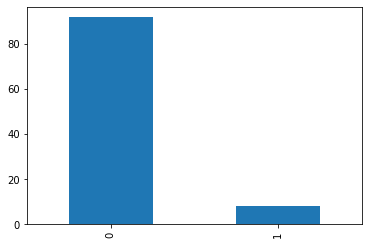

In [347]:
# Lets start with Churn Variable

(df_hvc["Churn"].value_counts(normalize=True)*100).plot.bar()
plt.show()

As previously stated, there is clear Data Imbalance which we will handle in the Data Preperation Phase.

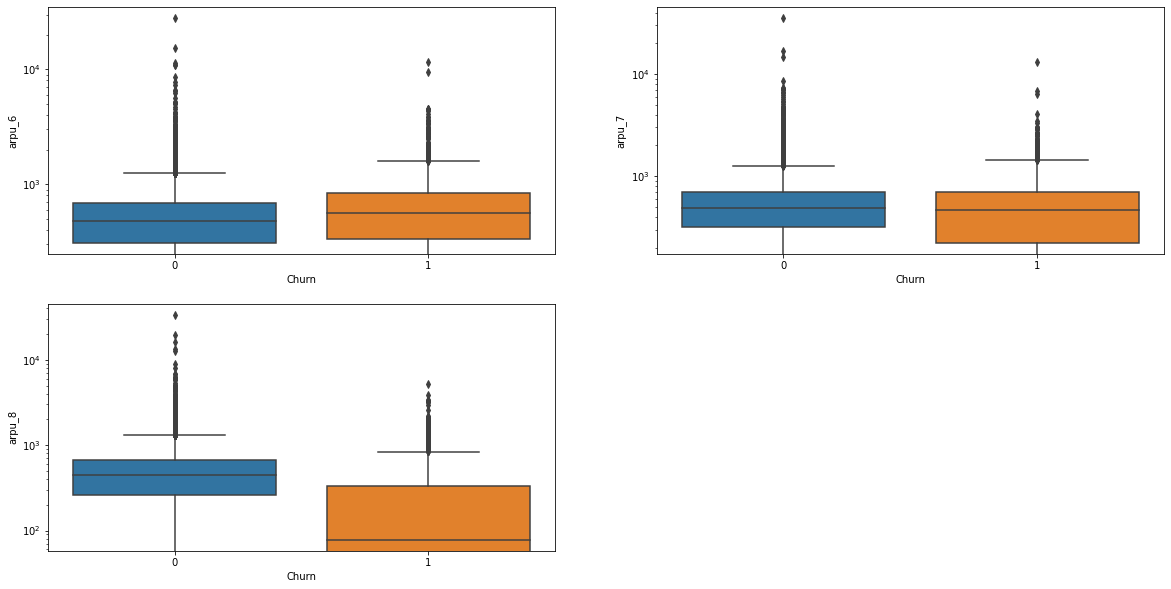

In [348]:
# Average Revenue per user
# Lets check the distribution of arpu_* columns vs churn columns

plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.yscale('log')
sns.boxplot(y='arpu_6', x='Churn', data=df_hvc)

plt.subplot(2,2,2)
plt.yscale('log')
sns.boxplot(y='arpu_7', x='Churn', data=df_hvc)

plt.subplot(2,2,3)
plt.yscale('log')
sns.boxplot(y='arpu_8', x='Churn', data=df_hvc)

plt.show()

As mentioned in the Case study that the data set was divided onto 3 phases - Good, Action and Churn phase.

If we check the month 6 and 7 (arpu_6 and arpu_7) then we can clearly observe that there does not seem to be any visible pattern between customer who eventually churned vs those who did not.             
But              
If we check the arpu_8 i.e. the 8th months average revenue per user then we can clearly see a dip which reinstates that this is the Action Phase.

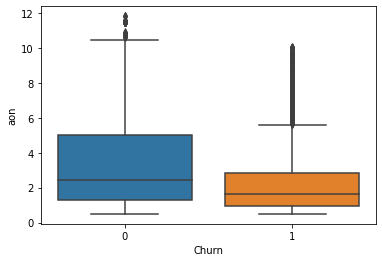

In [349]:
# Lets check the Churn vs AON (Age on Network)

sns.boxplot(y='aon', x='Churn', data=df_hvc)
plt.show()

As per the above plot, we cannot clearly state if age alone can determine if a customer would Churn since we have new and old customer alike in both Churned and Not-Churned classes of Churn but ingeneral customers with lower time spent with the network are more likely to churn.

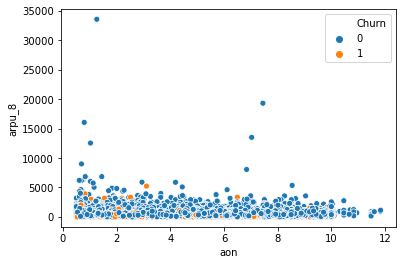

In [350]:
sns.scatterplot(x='aon', y="arpu_8", hue="Churn", data=df_hvc)
plt.show()

Again no clear division between Churn Classes.

Lets Check the pair plot for all these variables.

[]

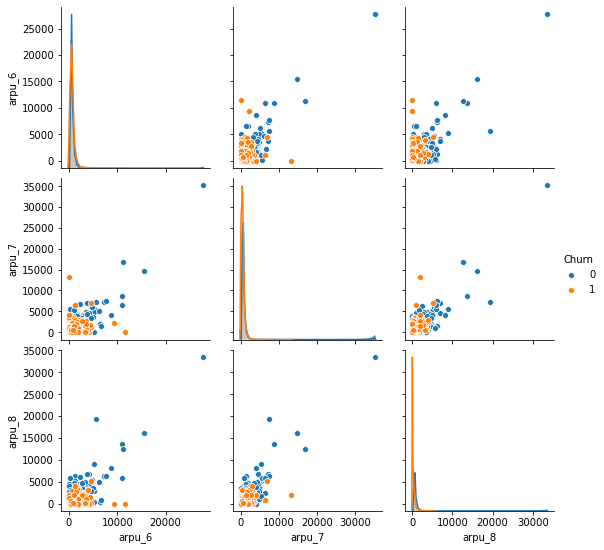

In [351]:
sns.pairplot(data=df_hvc[['arpu_6','arpu_7','arpu_8','Churn']],hue='Churn')
plt.plot()

**days_since_last_rech_ vs Churn**

Let's also check how the customer is behaving around the time of Churn. We saw that revenue per user goes down. So it is also likely that the customer activity in terms of recharges also starts going down. Let's check this using our derived variable - 'days_since_last_rech'

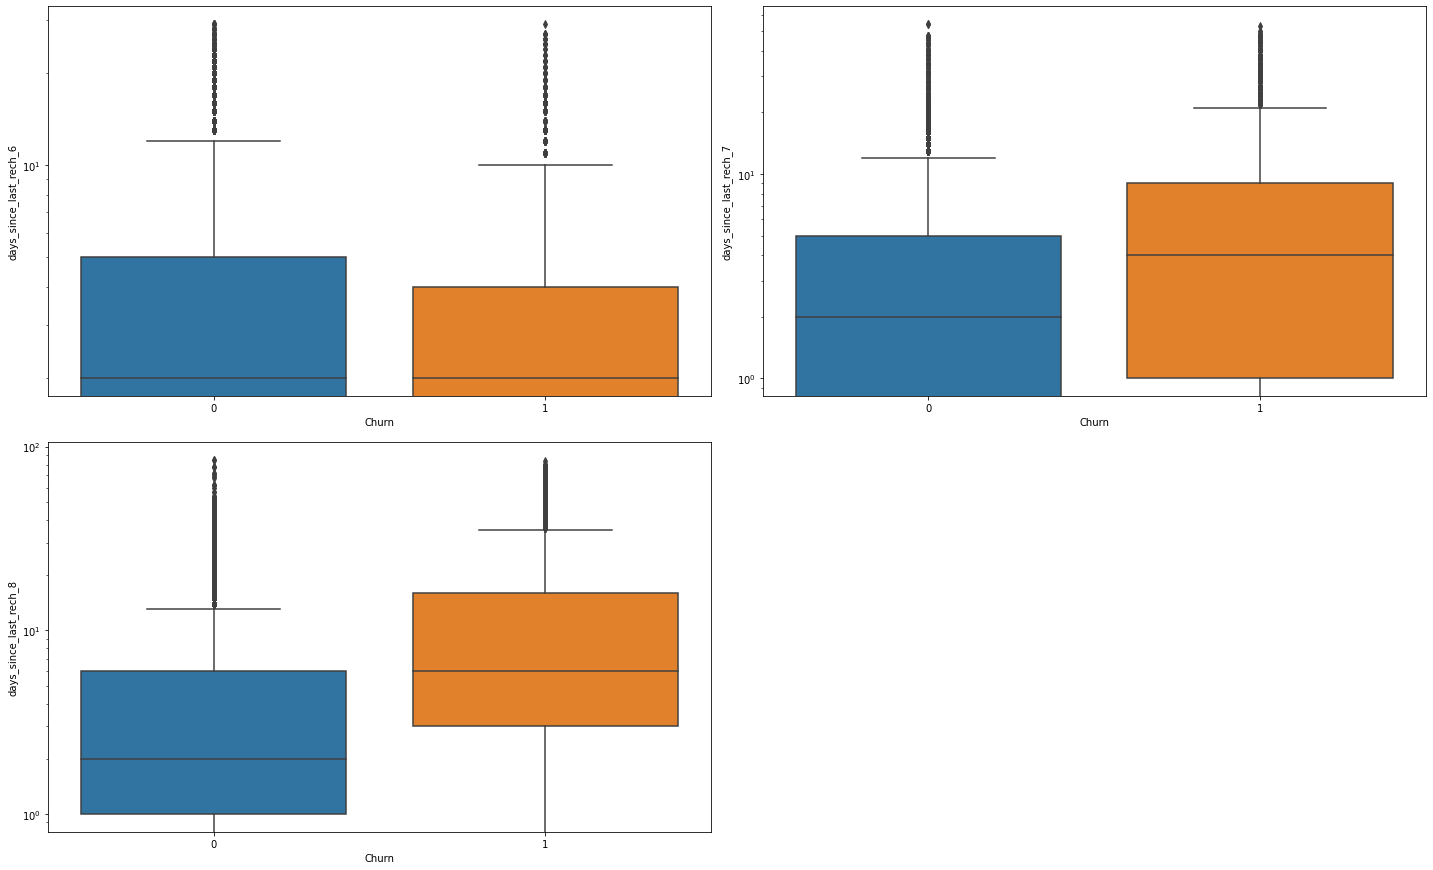

In [352]:
plt.figure(figsize =(20,12))
for i in enumerate(['days_since_last_rech_6','days_since_last_rech_7','days_since_last_rech_8']):
    plt.subplot(2,2,i[0]+1)
    plt.tight_layout()
    plt.yscale('log')
    sns.boxplot(y = i[1],x = 'Churn', data = df_hvc)

The boxplots tell a story - in the 6 month, the churn and non churn customers are identical. However by the 7th, we start seeing the number of days between recharges increasing. And by the 8th month, it is quite evident that frequency of recharges has reduced.

**total_ic_mou_ vs total_og_mou_**

Let's see if there is any similar difference in the incoming vs outgoing calls among the different months.

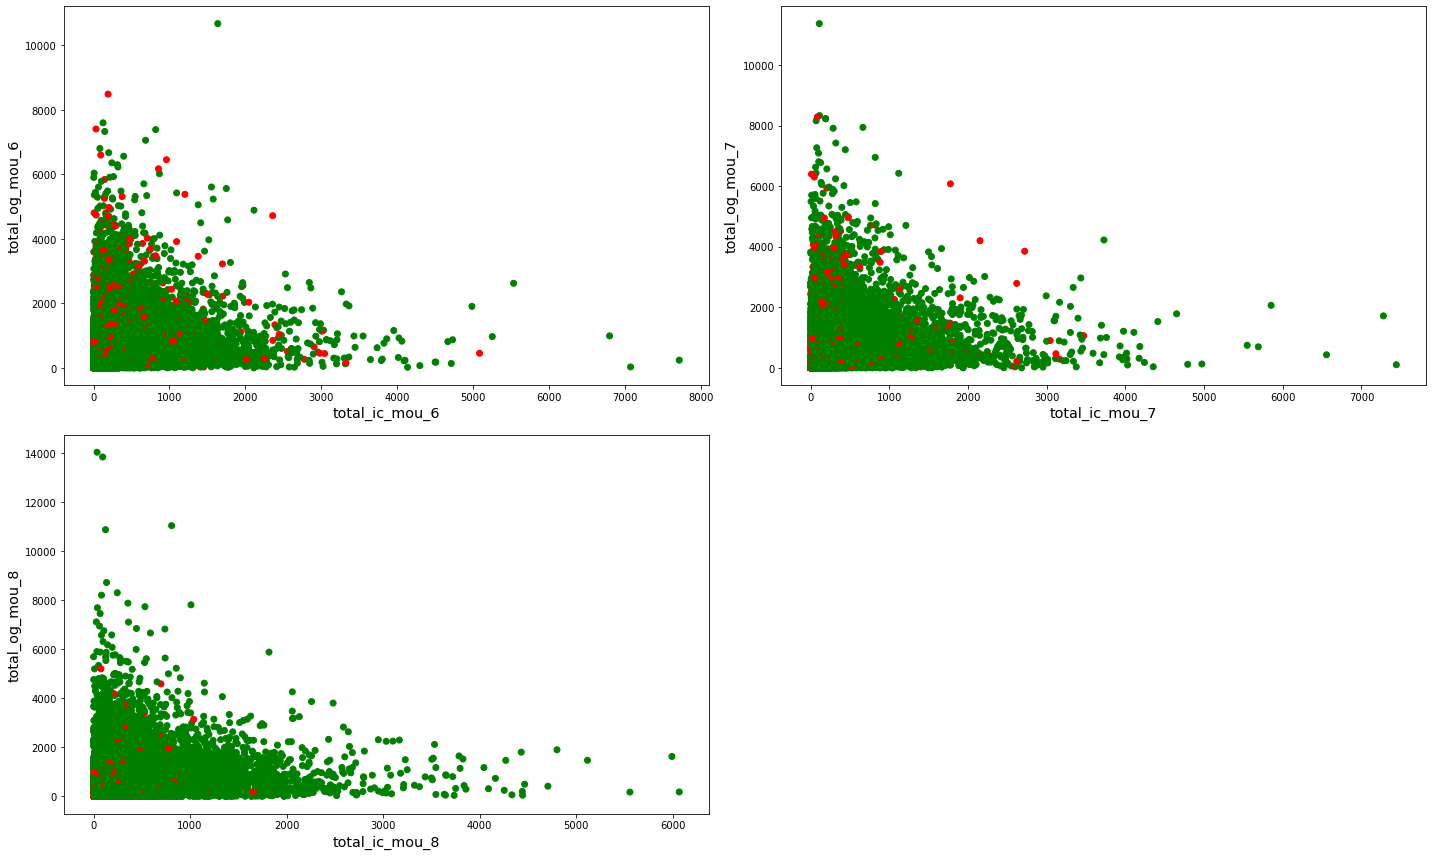

In [353]:
# total_ic_mou_ vs total_og_mou_ - Bivariate Analysis

colours = {1:'red',0:'green'}
plt.figure(figsize =(20,12))
for i in enumerate([['total_ic_mou_6','total_og_mou_6'],['total_ic_mou_7','total_og_mou_7'],['total_ic_mou_8','total_og_mou_8']]):
    plt.subplot(2,2,i[0]+1)
    plt.xlabel(i[1][0], fontsize = 'x-large')
    plt.ylabel(i[1][1], fontsize = 'x-large')
    plt.tight_layout()
    plt.scatter(df_hvc[i[1][0]],df_hvc[i[1][1]],c = df_hvc['Churn'].map(colours))   

plt.show()

We can note the following:-

* Although the range of minutes spent hasnt really changed among customers, the visibility of churn customers has substantially reduced in appearance in Month 8. This means that both incoming and outgoing have largely ceased during this period.


**vol_3g_mb_ vs _vbc_3g**

Let's also look at the possibility of churn customers leaning more towards data paid per usage during Month 8. We will look at while also comparing it with general 3g usage month to month.

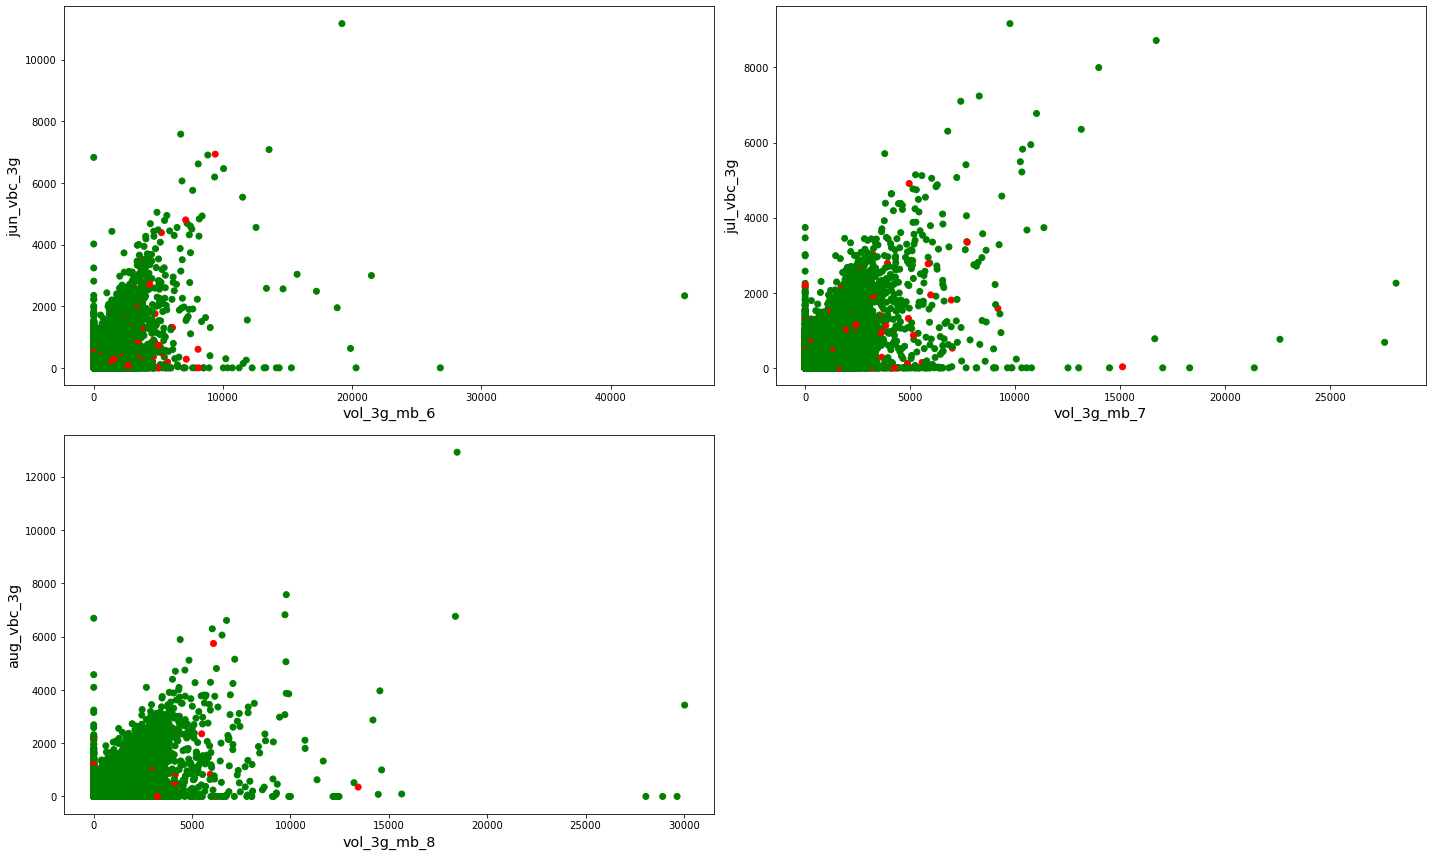

In [354]:
# vol_3g_mb_ vs _vbc_3g - Bivariate Analysis

colours = {1:'red',0:'green'}
plt.figure(figsize =(20,12))
for i in enumerate([['vol_3g_mb_6','jun_vbc_3g'],['vol_3g_mb_7','jul_vbc_3g'],['vol_3g_mb_8','aug_vbc_3g']]):
    plt.subplot(2,2,i[0]+1)
    plt.xlabel(i[1][0], fontsize = 'x-large')
    plt.ylabel(i[1][1], fontsize = 'x-large')
    plt.tight_layout()
    plt.scatter(df_hvc[i[1][0]],df_hvc[i[1][1]],c = df_hvc['Churn'].map(colours))   

plt.show()

We note the following:-

* Once again, we see that fewer Churn customers are active in Month 8, this time in terms of 3G usage.
* Usage does not seem to tend towards data being paid for basis usage.

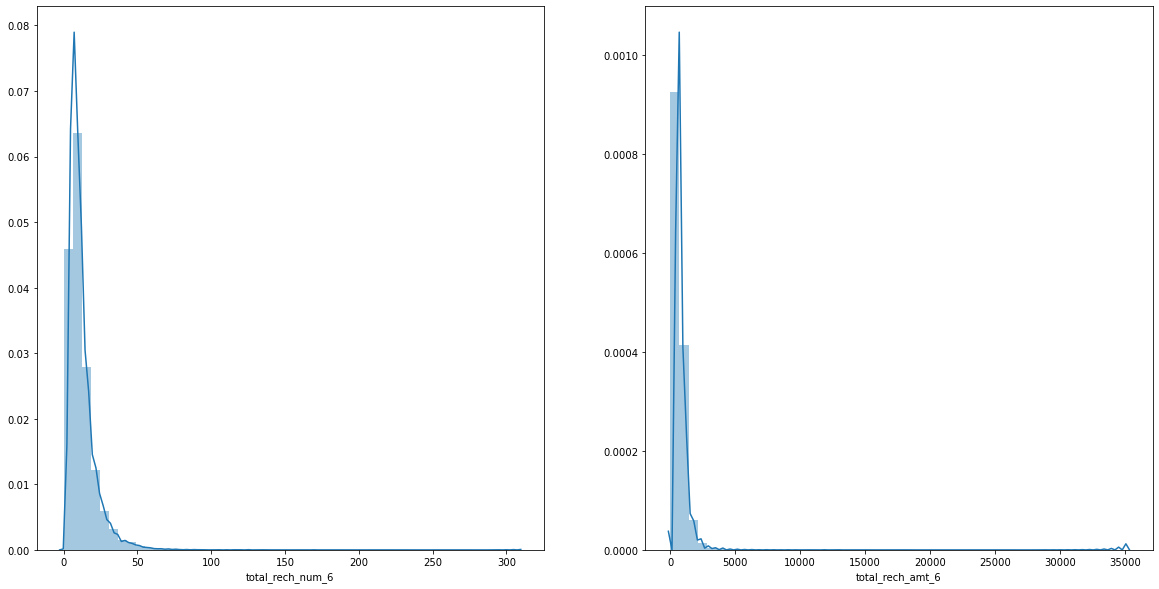

In [355]:
# Total Rechange Amount and Number

plt.figure(figsize=(20,10))
plt.title("Total Rechange Amount and Number Distribution")

plt.subplot(1,2,1)
sns.distplot(df_hvc['total_rech_num_6'])

plt.subplot(1,2,2)
sns.distplot(df_hvc['total_rech_amt_6'])

plt.show()

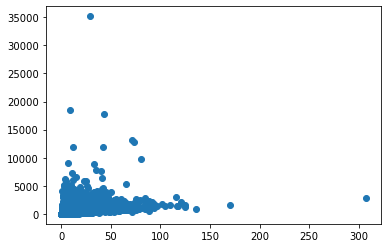

In [356]:
plt.scatter(x="total_rech_num_6", y="total_rech_amt_6", data=df_hvc)
plt.show()

We can observe that most of the recharge number is less than 50.

<Figure size 1728x864 with 0 Axes>

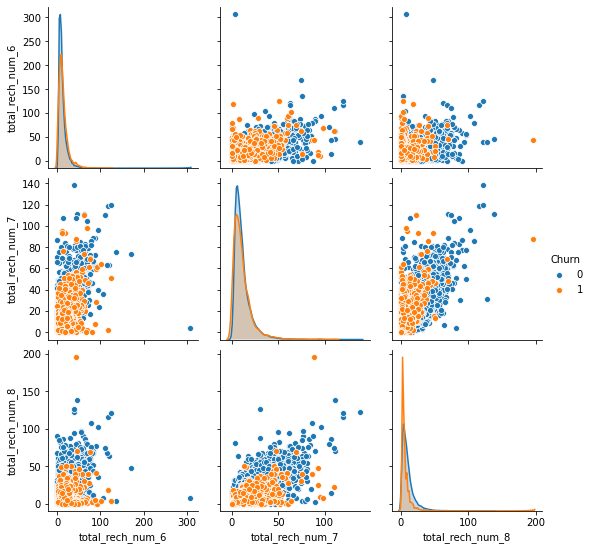

In [357]:
plt.figure(figsize=(24,12))
sns.pairplot(data=df_hvc[['total_rech_num_6','total_rech_num_7','total_rech_num_8','Churn']],hue='Churn')
plt.show()

In [358]:
# Lets create a generalized method to view BoxPlot

def display_box_plot(col):
    plt.figure(figsize=(18,15))
    global df_hvc    
    plt.subplot(2,3,1)
    plt.yscale("log")
    sns.boxplot(data=df_hvc, y=col+"_6",x="Churn",hue="Churn")
    plt.subplot(2,3,2)
    plt.yscale("log")
    sns.boxplot(data=df_hvc, y=col+"_7",x="Churn",hue="Churn")
    plt.subplot(2,3,3)
    plt.yscale("log")
    sns.boxplot(data=df_hvc, y=col+"_8",x="Churn",hue="Churn")
    plt.show()

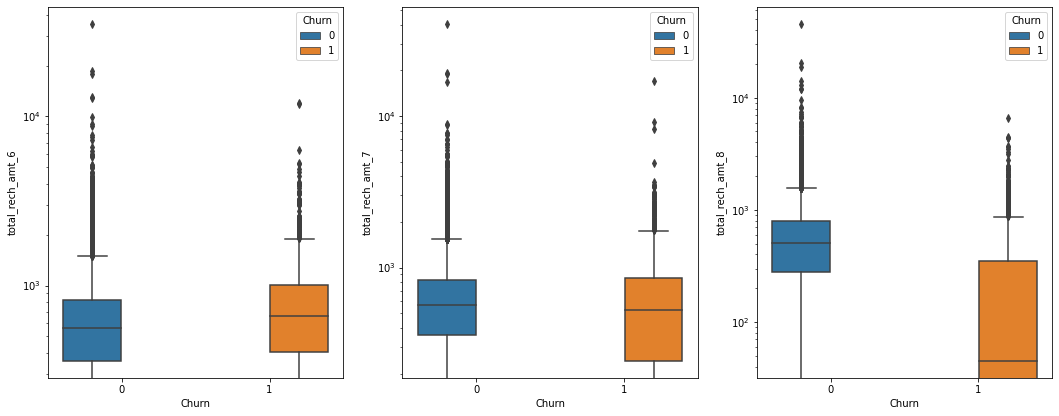

In [359]:
# Total Recharge Amount
display_box_plot("total_rech_amt")

One observation which we can clearly make from this is that there are large amount of outliers in the Dataset that needs to be handled. (Will be handled in Data Preperation Phase)

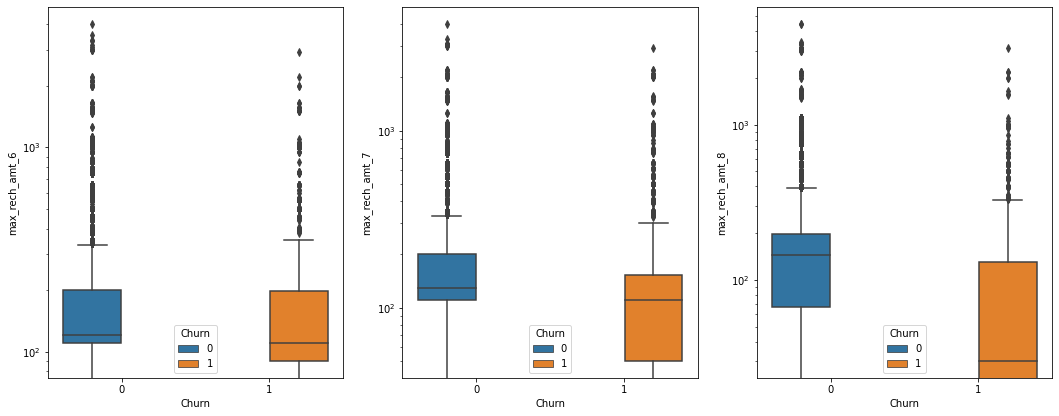

In [360]:
# Lets also check max_rech_amt_*

display_box_plot("max_rech_amt")

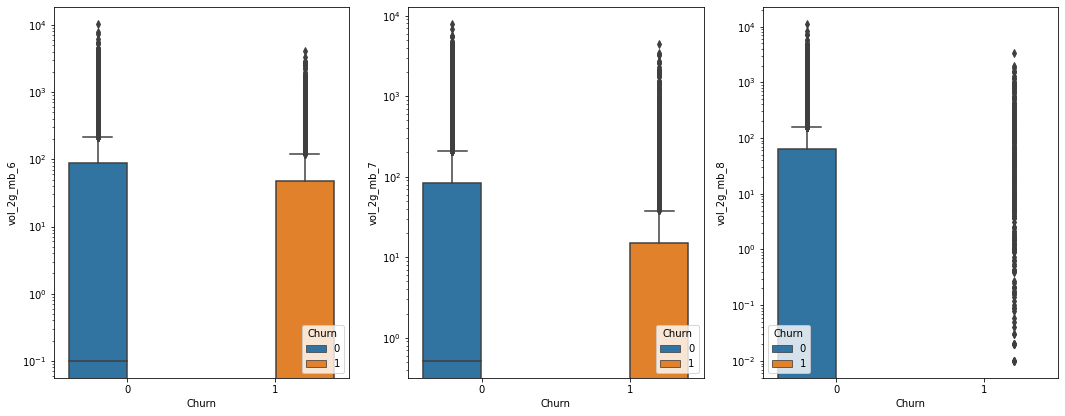

In [361]:
display_box_plot("vol_2g_mb")

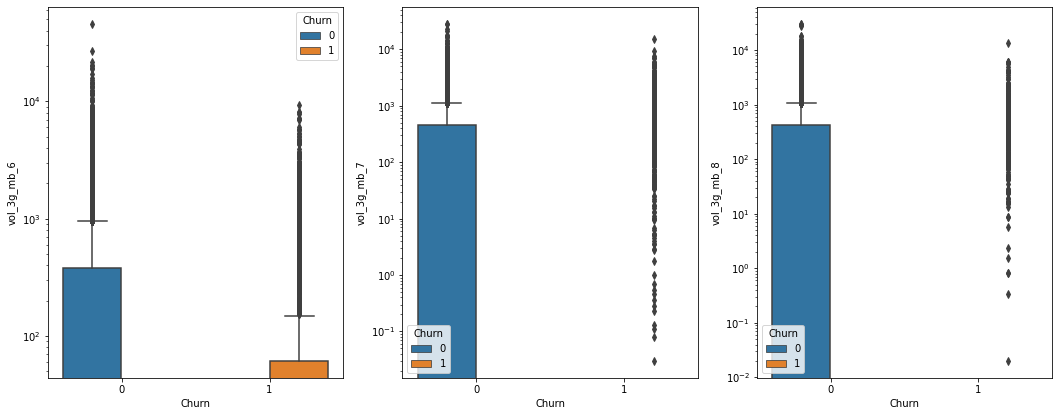

In [362]:
display_box_plot("vol_3g_mb")

Lets check the correlation between each variable

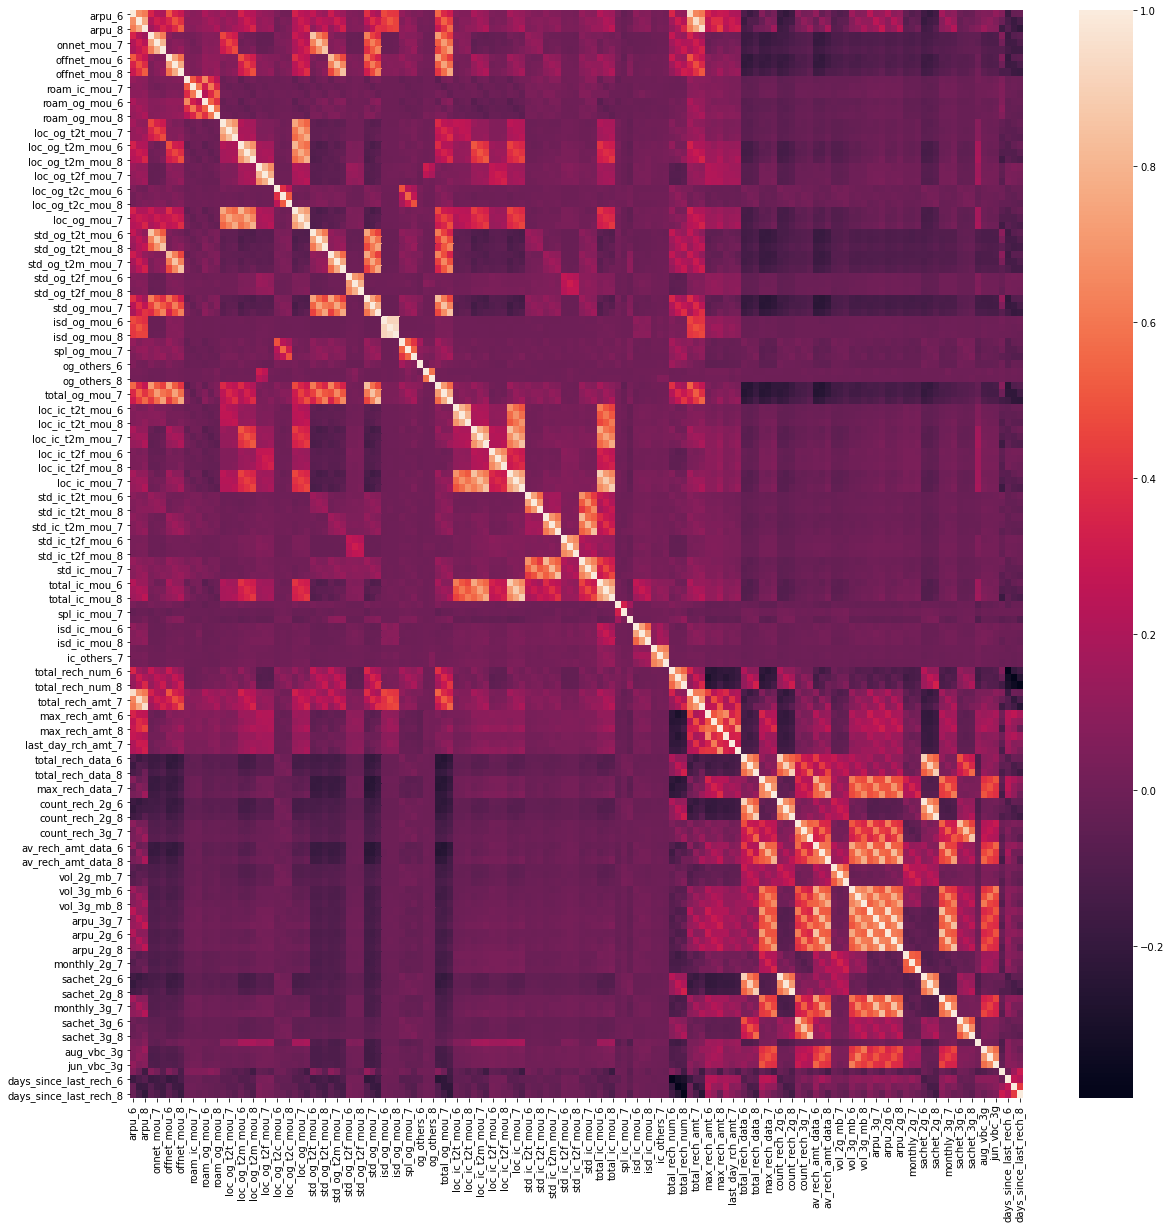

In [363]:
# Heatmap for correlation
plt.figure(figsize=(20,20))
sns.heatmap(df_hvc.corr())
plt.show()

In [364]:
#Assigning the correlation results to new variable
corr_df = df_hvc.corr()

#Assigning NaNs to values that are repeat comparisons. This will allow us to elimiate repeat comparisons post unstacking
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k = 1).astype(np.bool))

#Unstack the correlation data and resetting index to improve readability
corr_df = corr_df.unstack().reset_index()

#Rename columns
corr_df.columns = ['Variable_1','Variable_2','Correlation']

#Drop all rows where Correlation = NaN. As mentioned earlier, these were repeat comparisons.
corr_df.dropna(subset = ['Correlation'],inplace = True)

# Convert to absolute values as we are interested in strength of the correlation 
# and not if the variables are impacted positively or negatively
corr_df['Correlation'] = corr_df['Correlation'].abs()

corr_df.sort_values(by = 'Correlation', ascending =  False,inplace = True)
corr_df.head(10)

Variable_1       Variable_2  Correlation
20076       sachet_2g_8  count_rech_2g_8     0.987161
19926       sachet_2g_7  count_rech_2g_7     0.986408
19776       sachet_2g_6  count_rech_2g_6     0.984924
14157  total_rech_amt_8           arpu_8     0.956193
13857  total_rech_amt_6           arpu_6     0.949893
14007  total_rech_amt_7           arpu_7     0.947365
6599       isd_og_mou_8     isd_og_mou_7     0.943120
18897         arpu_2g_6        arpu_3g_6     0.940079
19197         arpu_2g_8        arpu_3g_8     0.937701
19047         arpu_2g_7        arpu_3g_7     0.936447

In [365]:
corr_df_high = corr_df.loc[corr_df["Correlation"] > 0.8, :]
corr_df_high.shape

(67, 3)

In [366]:
corr_df_high["Variable_1"].value_counts()

total_ic_mou_8        2
arpu_2g_8             2
arpu_2g_6             2
std_og_t2t_mou_8      2
sachet_2g_7           2
monthly_3g_8          2
sachet_2g_8           2
sachet_2g_6           2
loc_ic_mou_8          2
loc_ic_mou_7          2
arpu_2g_7             2
total_ic_mou_7        2
isd_og_mou_8          2
monthly_3g_7          2
monthly_3g_6          2
arpu_3g_7             1
loc_ic_t2m_mou_8      1
total_rech_amt_8      1
total_rech_amt_7      1
std_og_t2m_mou_6      1
count_rech_2g_8       1
loc_og_mou_8          1
total_ic_mou_6        1
std_og_t2t_mou_7      1
std_og_t2t_mou_6      1
loc_og_t2m_mou_8      1
av_rech_amt_data_8    1
std_ic_mou_6          1
sachet_3g_6           1
isd_og_mou_7          1
loc_og_mou_6          1
count_rech_2g_6       1
arpu_3g_8             1
loc_ic_mou_6          1
std_og_t2m_mou_7      1
loc_ic_t2t_mou_8      1
arpu_3g_6             1
std_ic_mou_8          1
total_og_mou_7        1
sachet_3g_7           1
loc_og_t2f_mou_7      1
total_og_mou_6  

In [367]:
corr_df_high.sort_values(by = ['Variable_1', "Variable_2", "Correlation"], ascending = [True, True, False],inplace = True)
corr_df_high

Variable_1          Variable_2  Correlation
18897           arpu_2g_6           arpu_3g_6     0.940079
18888           arpu_2g_6  av_rech_amt_data_6     0.850849
19047           arpu_2g_7           arpu_3g_7     0.936447
19038           arpu_2g_7  av_rech_amt_data_7     0.829873
19197           arpu_2g_8           arpu_3g_8     0.937701
19188           arpu_2g_8  av_rech_amt_data_8     0.835009
18441           arpu_3g_6  av_rech_amt_data_6     0.821576
18591           arpu_3g_7  av_rech_amt_data_7     0.804287
18741           arpu_3g_8  av_rech_amt_data_8     0.813000
17391  av_rech_amt_data_8     max_rech_data_8     0.801613
16194     count_rech_2g_6   total_rech_data_6     0.911384
16344     count_rech_2g_7   total_rech_data_7     0.910279
16494     count_rech_2g_8   total_rech_data_8     0.906664
6449         isd_og_mou_7        isd_og_mou_6     0.915247
6598         isd_og_mou_8        isd_og_mou_6     0.918187
6599         isd_og_mou_8        isd_og_mou_7     0.943120
9444         loc_ic_mou_6    loc_ic_t2m_mou_6     0.845084
9599         loc_ic_mou_7        loc_ic_mou_6     0.821027
9594         loc_ic_mou_7    loc_ic_t2m_mou_7     0.835261
9749         loc_ic_mou_8        loc_ic_mou_7     0.840179
9744         loc_ic_mou_8    loc_ic_t2m_mou_8     0.848865
8849     loc_ic_t2m_mou_8    loc_ic_t2m_mou_7     0.812493
8249     loc_ic_t2t_mou_7    loc_ic_t2t_mou_6     0.801786
8399     loc_ic_t2t_mou_8    loc_ic_t2t_mou_7     0.806793
4041         loc_og_mou_6    loc_og_t2m_mou_6     0.804608
4199         loc_og_mou_7        loc_og_mou_6     0.806892
4349         loc_og_mou_8        loc_og_mou_7     0.841927
3299     loc_og_t2f_mou_7    loc_og_t2f_mou_6     0.809061
2999     loc_og_t2m_mou_8    loc_og_t2m_mou_7     0.823666
2549     loc_og_t2t_mou_8    loc_og_t2t_mou_7     0.833081
20241        monthly_3g_6           arpu_2g_6     0.844105
20238        monthly_3g_6           arpu_3g_6     0.827427
20391        monthly_3g_7           arpu_2g_7     0.850982
20388        monthly_3g_7           arpu_3g_7     0.836729
20541        monthly_3g_8           arpu_2g_8     0.854830
20538        monthly_3g_8           arpu_3g_8     0.838083
749           onnet_mou_8         onnet_mou_7     0.806053
19776         sachet_2g_6     count_rech_2g_6     0.984924
19770         sachet_2g_6   total_rech_data_6     0.903875
19926         sachet_2g_7     count_rech_2g_7     0.986408
19920         sachet_2g_7   total_rech_data_7     0.904243
20076         sachet_2g_8     count_rech_2g_8     0.987161
20070         sachet_2g_8   total_rech_data_8     0.900629
20673         sachet_3g_6     count_rech_3g_6     0.851086
20823         sachet_3g_7     count_rech_3g_7     0.857999
20973         sachet_3g_8     count_rech_3g_8     0.875291
11244        std_ic_mou_6    std_ic_t2m_mou_6     0.814196
11394        std_ic_mou_7    std_ic_t2m_mou_7     0.819554
11544        std_ic_mou_8    std_ic_t2m_mou_8     0.845868
4923     std_og_t2m_mou_6        offnet_mou_6     0.830354
5073     std_og_t2m_mou_7        offnet_mou_7     0.854595
5223     std_og_t2m_mou_8        offnet_mou_8     0.851078
4473     std_og_t2t_mou_6         onnet_mou_6     0.859409
4623     std_og_t2t_mou_7         onnet_mou_7     0.860335
4773     std_og_t2t_mou_8         onnet_mou_8     0.860668
4799     std_og_t2t_mou_8    std_og_t2t_mou_7     0.802101
11685      total_ic_mou_6        loc_ic_mou_6     0.896472
11835      total_ic_mou_7        loc_ic_mou_7     0.884396
11849      total_ic_mou_7      total_ic_mou_6     0.803042
11985      total_ic_mou_8        loc_ic_mou_8     0.896211
11999      total_ic_mou_8      total_ic_mou_7     0.820529
7638       total_og_mou_6        std_og_mou_6     0.834123
7788       total_og_mou_7        std_og_mou_7     0.849694
7938       total_og_mou_8        std_og_mou_8     0.851307
13857    total_rech_amt_6              arpu_6     0.949893
14007    total_rech_amt_7              arpu_7     0.947365
14157    total_rech_amt_8              arpu_8     0.956193

It evident that there is high correlation between variables.                  
To handle this:
1. We can remove few columns which are highly correlated thus handling any possible multicolinearity prior to RFE,
2. Use RFE and then check VIF and remove those columns which have very high vif still
3. Another option is to use PCA and remove the multicolinearity but this will end up in model loosing its interpretebility.
        
During this case study we will focus on Point 2 and 3.

## Data Preperation/Preprocessing

Here we will prepare out dataset to be ready for modelling process. We will focus on the following activities
1. Outlier Treatment
2. Scaling/Transformation
3. X, y and Train Test Split
4. Target Variable - Data Balancing

### Dummification                           
We saw there were few categorical columns in the dataset but we considered them to be highly skewed towards one value and hence dropped them.

### Outliers and Scaling

As observed during the EDA process there are multiple variables with outlier, lets observe few again

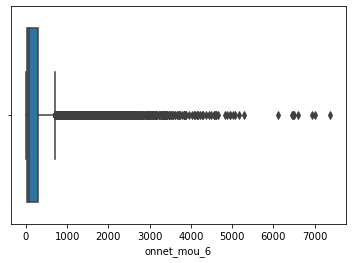

In [368]:
sns.boxplot(x="onnet_mou_6", data=df_hvc)
plt.show()

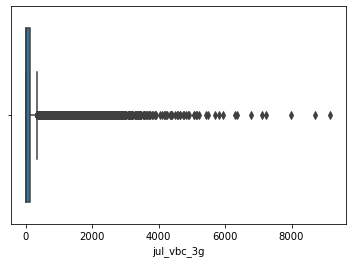

In [369]:
sns.boxplot(x="jul_vbc_3g", data=df_hvc)
plt.show()

We can clearly observe that it has large amount of outliers, before model building we need to handle these.

For outlier treatment we have the following options:
- Removing outlier
- Capping/Flooring outlier i.e. replacing the outlier values with 99th or 95th percentile on the upper bound ( 1st or 5th percentile in the lower bound)
- Transforming

In our case capping and removal of outlier is not a good option as
- Removel of outlier would mean we will loose datapoints and we already have very less data points
- Capping/flooring results in false representation as the original value is replaced with another lesser value. This is also not a recommended approach.

Transforming using PowerTransform or StandardTransform seems a better approach to go by. Lets use PowerTransformer this will not only Normalize our variables but also scale them.

NOTE: We will not input the Target variable and Binary Categorical Variables here as those dont require any transformation/scaling.

This means excluding Churn, date_rech_mnth_begin_6,	date_rech_mnth_begin_7,	date_rech_mnth_begin_8,	night_pck_user_6_Not_Active, night_pck_user_6_Not_Bought, night_pck_user_7_Not_Active, night_pck_user_7_Not_Bought, night_pck_user_8_Not_Active, night_pck_user_8_Not_Bought, fb_user_6_Not_Active, fb_user_6_Not_Bought, fb_user_7_Not_Active, fb_user_7_Not_Bought, fb_user_8_Not_Active and fb_user_8_Not_Bought we will include all the columns.

In [370]:
# Columns to be considered arpu_6 to jun_vbc_3g

df_hvc.loc[:,"arpu_6":"jun_vbc_3g"].columns.to_list()

['arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t

In [371]:
cols_scale = df_hvc.loc[:,"arpu_6":"jun_vbc_3g"].columns.to_list()

NOTE: Scaling/Transformation should be done after Train-Test split hence we will 1st split the data set into train and test then we will Fit & Transform the variables in Train and only transform variables in Test.

### Train - Test Split and Balancing

In [372]:
X = df_hvc.drop(['Churn'],axis=1)
y = df_hvc["Churn"]

In [373]:
# Importing Libraries for Train test split
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.7, random_state=100, stratify = y)

**FIT_Transform X_Train and Transform X_Test**

In [374]:
# Importing Library needed
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
X_train[cols_scale] = pt.fit_transform(X_train[cols_scale])
X_test[cols_scale] = pt.transform(X_test[cols_scale])

In [375]:
X_train.head()

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
81898 -0.703869 -1.035177 -0.034410    -1.375990    -1.364952    -1.077084   
33489 -0.455474 -0.417298 -0.352436     0.193422     0.712935     0.463859   
21296  0.241735  0.845450  0.589140     0.747685     0.787706     0.859692   
85765  0.089140  0.284887 -0.213931    -0.128255     0.032975    -0.602238   
51152 -0.648364 -1.232916 -0.754684    -0.986974    -1.253230    -1.044573   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
81898     -0.390665     -0.767499     -0.189607      -0.510279      -0.446403   
33489     -0.720480     -0.308048     -0.102358       2.089108      -0.446403   
21296      0.664391      0.509937      0.881307      -0.510279      -0.446403   
85765      1.138705      1.292581      0.725110      -0.510279      -0.446403   
51152     -0.967235     -1.047354     -0.834572      -0.510279      -0.446403   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
81898      -0.460474      -0.512754      -0.450652      -0.458794   
33489      -0.460474       2.042889      -0.450652      -0.458794   
21296      -0.460474      -0.512754      -0.450652      -0.458794   
85765       2.277683      -0.512754      -0.450652       2.260261   
51152      -0.460474      -0.512754      -0.450652      -0.458794   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
81898         -1.032105         -1.051673         -0.705175          0.286913   
33489         -0.603979          0.345878          0.828053         -1.082206   
21296          1.462534          1.532682          1.531638          1.285095   
85765          0.564640          0.731510         -0.324919          1.043677   
51152         -0.490158         -0.892315         -0.661590         -0.521443   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
81898         -0.307750          0.355458         -0.874839          1.247432   
33489         -0.311902          0.109276         -0.874839          0.351817   
21296          1.121457          1.382752          1.520018          1.580253   
85765          0.569724          0.241999         -0.874839         -0.886617   
51152         -0.513858         -0.331350         -0.874839         -0.886617   

       loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
81898          1.115245         -0.541896          1.949416         -0.549851   
33489          0.687392         -0.541896          2.009429         -0.549851   
21296          1.509926         -0.541896         -0.561123         -0.549851   
85765          0.190220         -0.541896         -0.561123         -0.549851   
51152         -0.852987          2.056627          0.575328         -0.549851   

       loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
81898     -0.007597     -0.465224      0.111505         -0.976250   
33489     -1.035295     -0.204857      0.288375          0.980106   
21296      1.355260      1.312333      1.446502          0.545062   
85765      0.818230      0.502746      0.021197         -0.729441   
51152     -0.637874     -0.701622     -0.501355         -0.976250   

       std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
81898         -0.972969         -0.918383         -1.196019         -1.185406   
33489          1.225151          1.019231          0.289995          0.587944   
21296          0.202782         -0.280264          0.377355          0.290396   
85765         -0.972969          0.130755          1.280932          1.402651   
51152         -0.972969         -0.918383         -1.196019         -1.185406   

       std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
81898         -0.711349          2.338126         -0.409633          2.641658   
33489          0.725550         -0.418753         -0.409633         -0.396950   
21296          0.752695         

Now lets check if we have handled most of the outlier or not. 

**`Note`**: some outlier might still be there but we need to handle most extreme outlier which we have.

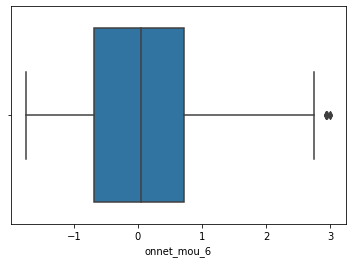

In [376]:
sns.boxplot(x="onnet_mou_6", data=X_train)
plt.show()

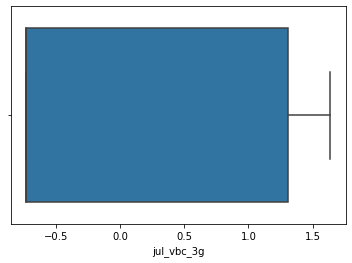

In [377]:
sns.boxplot(x="jul_vbc_3g", data=X_train)
plt.show()

**Balance Target Variable**

As we know that the target variable is hightly imbalanced

In [378]:
y_train.value_counts(normalize=True)

0    0.918619
1    0.081381
Name: Churn, dtype: float64

We need to balance this out, we can do this in the followign 2 ways
1. Create new random synthetic samples using SMOTE
2. Provide weights to already existing classes using Weight of class method

For this case study we will opt for smote

In [379]:
# Lets import the libraries required
# !pip install imblearn
from imblearn.over_sampling import SMOTE

In [380]:
smote = SMOTE(random_state=42)
X_train_bal,y_train_bal = smote.fit_resample(X_train,y_train)

In [381]:
pd.Series(y_train_bal).value_counts(normalize=True)

1    0.5
0    0.5
Name: Churn, dtype: float64

In [382]:
X_train_bal.shape

(38582, 148)

Now we can say that the Data has been Balanced out in the Target Variable

# Model Building

As mentioned in the Case study, we will follow 2 approachs here to build the model
1. Interpretable Models - These are the models which will present interpretable data to the customer so that they can have a better understanding if the user would churn or not. Models evaluated here are
    - Logistic Regression
    - Decision Trees
    - Random Forest
2. PCA Model - We will use PCA on all the columns since we did not handle multicolinearity above and then use 
    - Logistic Regression
    - Decision Trees
    - Random Forest 
3. Conclusion - Here we will compare performance metrics across the models. 
    
To obtain models which are highly accurate but with low interpretability

**NOTE**: We will use scoring metric with Accuracy and Recall.                        
In our model/Case Study the occurrence of false negatives is unaccepted/intolerable. This is becasue we dont want to incorrectly identify a customer who is going to Churn as Not going to Churn but we are okay if we classify a customer who will not churn as churn, this means for us it is okay if we get some extra false positives over saving some false negatives. Therefore Recall is the more important metric for this case study.

## 1. Interpretable Models

### RFE + Logistic


In [383]:
#  Lets import the necessary Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [384]:
# Methods to be used for RFE + Logistic Regression

# Display VIF
def display_VIF(X_train, cols):
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def display_Sensitivity(confusion):
    TP = confusion[1,1] # true positive 
    FN = confusion[1,0] # false negatives
    print("Sensitivity/Recall :", round(TP / float(TP+FN),4))
    
def display_Specificity(confusion):
    TN = confusion[0,0] # true Negative 
    FP = confusion[0,1] # false negatives
    print("Specificity :", round(TN / float(TN+FP),4))
    
def display_precision(confusion):
    TP = confusion[1,1] # true positive 
    FP = confusion[0,1] # false negatives
    print("Precision :", round(TP / float(TP+FP),4))
    
def display_metrics(y_actual, y_pred, confusion):
    print("Overall Accuracy :", round(metrics.accuracy_score(y_actual, y_pred),4))
    # Lets check the Sensitivity/Recall as well
    display_Sensitivity(confusion)
    # Lets check the Precision as well
    display_precision(confusion)    

Here we will follow these steps
1. use RFE to get the top 10-15 variables, then
2. we will create model using statsmodels and then reduce the p-value and VIF till we have no variable above threshold
3. Once we have all the variables within thresholds, we will do hyper parameter tuning on Logistic regression using those top few variables

In [385]:
%%time
# Lets create an object for Logistic Regression
logreg = LogisticRegression(random_state=100)

rfe = RFE(logreg, 20)  # running RFE with 20 variables as output
rfe = rfe.fit(X_train_bal, y_train_bal)

Wall time: 1min 12s


In [386]:
# Lets check the top 20 features

cols_rfe = X_train_bal.columns[rfe.support_]
cols_rfe

Index(['offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'og_others_8',
       'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7',
       'max_rech_amt_6', 'last_day_rch_amt_8', 'max_rech_data_8',
       'count_rech_3g_8', 'av_rech_amt_data_8', 'arpu_2g_6', 'monthly_2g_8',
       'monthly_3g_8', 'sachet_3g_8'],
      dtype='object')

`Iteration 1`

In [387]:
# Lets start the Model Creation

X_train_rfe = X_train_bal[cols_rfe]
X_train_rfe = sm.add_constant(X_train_rfe)

logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38561
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12943.
Date:                Mon, 30 Nov 2020   Deviance:                       25886.
Time:                        19:24:15   Pearson chi2:                 4.68e+04
No. Iterations:                    24                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8242     90.918     -0.020      0.984    -180.021     176.373
offnet_mou_8          -0.4650      0.033    -14.204      0.000      -0.529      -0.401
roam_og_mou_8          0.6026      0.015     39.894      0.000       0.573       0.632
std_og_t2m_mou_8       0.2988      0.031      9.759      0.000       0.239       0.359
og_others_8           -1.7168   1258.883     -0.001      0.999   -2469.083    2465.649
loc_ic_t2m_mou_7       0.3576      0.028     12.833      0.000       0.303       0.412
loc_ic_mou_8          -1.1147      0.035    -32.291      0.000      -1.182      -1.047
std_ic_mou_8          -0.4048      0.025    -16.222      0.000      -0.454      -0.356
spl_ic_mou_8          -0.3751      0.025    -14.883      0.000      -0.425      -0.326
total_rech_num_8      -0.3721      0.024    -15.471      0.000      -0.419      -0.325
total_rech_amt_6       0.2983      0.022     13.666      0.000       0.255       0.341
total_rech_amt_7       0.3069      0.019     16.240      0.000       0.270       0.344
max_rech_amt_6        -0.2857      0.023    -12.192      0.000      -0.332      -0.240
last_day_rch_amt_8    -0.6206      0.018    -35.408      0.000      -0.655      -0.586
max_rech_data_8        1.5038      0.142     10.606      0.000       1.226       1.782
count_rech_3g_8        1.0976      0.201      5.462      0.000       0.704       1.491
av_rech_amt_data_8    -1.9690      0.138    -14.280      0.000      -2.239      -1.699
arpu_2g_6              0.3015      0.024     12.473      0.000       0.254       0.349
monthly_2g_8          -0.4171      0.033    -12.655      0.000      -0.482      -0.352
monthly_3g_8          -1.1914      0.170     -7.015      0.000      -1.524      -0.859
sachet_3g_8           -0.7757      0.134     -5.789      0.000      -1.038      -0.513
======================================================================================
"""

We can see that og_others_8 has p-value more that 0.05, lets drop it and rebuild the model.

In [388]:
# Dropping og_others_8
X_train_rfe.drop("og_others_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("og_others_8")

`Iteration 2`

In [389]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38562
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12959.
Date:                Mon, 30 Nov 2020   Deviance:                       25919.
Time:                        19:24:16   Pearson chi2:                 4.69e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7047      0.024    -72.393      0.000      -1.751      -1.659
offnet_mou_8          -0.4659      0.033    -14.239      0.000      -0.530      -0.402
roam_og_mou_8          0.6038      0.015     39.997      0.000       0.574       0.633
std_og_t2m_mou_8       0.2984      0.031      9.746      0.000       0.238       0.358
loc_ic_t2m_mou_7       0.3585      0.028     12.873      0.000       0.304       0.413
loc_ic_mou_8          -1.1166      0.034    -32.366      0.000      -1.184      -1.049
std_ic_mou_8          -0.4048      0.025    -16.231      0.000      -0.454      -0.356
spl_ic_mou_8          -0.3747      0.025    -14.873      0.000      -0.424      -0.325
total_rech_num_8      -0.3726      0.024    -15.507      0.000      -0.420      -0.326
total_rech_amt_6       0.2989      0.022     13.701      0.000       0.256       0.342
total_rech_amt_7       0.3068      0.019     16.240      0.000       0.270       0.344
max_rech_amt_6        -0.2865      0.023    -12.237      0.000      -0.332      -0.241
last_day_rch_amt_8    -0.6202      0.018    -35.417      0.000      -0.654      -0.586
max_rech_data_8        1.5076      0.142     10.635      0.000       1.230       1.785
count_rech_3g_8        1.0936      0.200      5.455      0.000       0.701       1.486
av_rech_amt_data_8    -1.9726      0.138    -14.310      0.000      -2.243      -1.702
arpu_2g_6              0.3019      0.024     12.496      0.000       0.255       0.349
monthly_2g_8          -0.4167      0.033    -12.646      0.000      -0.481      -0.352
monthly_3g_8          -1.1886      0.169     -7.016      0.000      -1.521      -0.857
sachet_3g_8           -0.7747      0.134     -5.795      0.000      -1.037      -0.513
======================================================================================
"""

We can see that there are no columns with p-value more that 0.05, hence lets check the VIF's

In [390]:
# VIF
display_VIF(X_train_rfe, cols_rfe)

              Features    VIF
12     max_rech_data_8  67.15
14  av_rech_amt_data_8  61.57
13     count_rech_3g_8  24.17
17        monthly_3g_8  14.84
18         sachet_3g_8   8.32
0         offnet_mou_8   6.20
4         loc_ic_mou_8   6.01
2     std_og_t2m_mou_8   3.97
5         std_ic_mou_8   3.09
7     total_rech_num_8   2.99
3     loc_ic_t2m_mou_7   2.75
16        monthly_2g_8   2.13
10      max_rech_amt_6   2.10
8     total_rech_amt_6   1.84
11  last_day_rch_amt_8   1.82
9     total_rech_amt_7   1.71
15           arpu_2g_6   1.41
1        roam_og_mou_8   1.30
6         spl_ic_mou_8   1.08


We can observe that there are features with very high VIF (inf) lets drop -> max_rech_data_8 and then rebuild the model and check.

In [391]:
# Dropping max_rech_data_8  
X_train_rfe.drop("max_rech_data_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("max_rech_data_8")

`Iteration 3`

In [392]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38563
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13019.
Date:                Mon, 30 Nov 2020   Deviance:                       26037.
Time:                        19:24:17   Pearson chi2:                 4.77e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6729      0.023    -73.046      0.000      -1.718      -1.628
offnet_mou_8          -0.4401      0.033    -13.518      0.000      -0.504      -0.376
roam_og_mou_8          0.6112      0.015     40.570      0.000       0.582       0.641
std_og_t2m_mou_8       0.3022      0.031      9.893      0.000       0.242       0.362
loc_ic_t2m_mou_7       0.3519      0.028     12.647      0.000       0.297       0.406
loc_ic_mou_8          -1.1104      0.034    -32.218      0.000      -1.178      -1.043
std_ic_mou_8          -0.3986      0.025    -16.013      0.000      -0.447      -0.350
spl_ic_mou_8          -0.3770      0.025    -15.013      0.000      -0.426      -0.328
total_rech_num_8      -0.4307      0.024    -18.287      0.000      -0.477      -0.385
total_rech_amt_6       0.3093      0.022     14.176      0.000       0.267       0.352
total_rech_amt_7       0.3206      0.019     17.008      0.000       0.284       0.358
max_rech_amt_6        -0.2904      0.023    -12.419      0.000      -0.336      -0.245
last_day_rch_amt_8    -0.6269      0.017    -35.895      0.000      -0.661      -0.593
count_rech_3g_8        0.9417      0.174      5.416      0.000       0.601       1.282
av_rech_amt_data_8    -0.5570      0.030    -18.625      0.000      -0.616      -0.498
arpu_2g_6              0.2976      0.024     12.359      0.000       0.250       0.345
monthly_2g_8          -0.2774      0.030     -9.235      0.000      -0.336      -0.219
monthly_3g_8          -0.9261      0.145     -6.373      0.000      -1.211      -0.641
sachet_3g_8           -0.6818      0.116     -5.896      0.000      -0.908      -0.455
======================================================================================
"""

We can see that there are no columns with p-value more that 0.05, hence lets check the VIF's

In [393]:
# VIF
display_VIF(X_train_rfe, cols_rfe)

              Features    VIF
12     count_rech_3g_8  24.13
16        monthly_3g_8  14.64
17         sachet_3g_8   8.28
0         offnet_mou_8   6.15
4         loc_ic_mou_8   6.01
2     std_og_t2m_mou_8   3.97
13  av_rech_amt_data_8   3.82
5         std_ic_mou_8   3.09
7     total_rech_num_8   2.83
3     loc_ic_t2m_mou_7   2.75
10      max_rech_amt_6   2.10
8     total_rech_amt_6   1.84
11  last_day_rch_amt_8   1.82
15        monthly_2g_8   1.73
9     total_rech_amt_7   1.71
14           arpu_2g_6   1.41
1        roam_og_mou_8   1.29
6         spl_ic_mou_8   1.08


We can observe that there are features with very high VIF (inf) lets drop -> count_rech_3g_8 and then rebuild the model and check.

In [394]:
# Dropping count_rech_3g_8
X_train_rfe.drop("count_rech_3g_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("count_rech_3g_8")

`Iteration 4`

In [395]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38564
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13041.
Date:                Mon, 30 Nov 2020   Deviance:                       26081.
Time:                        19:24:17   Pearson chi2:                 4.81e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6568      0.022    -73.786      0.000      -1.701      -1.613
offnet_mou_8          -0.4450      0.033    -13.691      0.000      -0.509      -0.381
roam_og_mou_8          0.6099      0.015     40.527      0.000       0.580       0.639
std_og_t2m_mou_8       0.3061      0.030     10.038      0.000       0.246       0.366
loc_ic_t2m_mou_7       0.3500      0.028     12.593      0.000       0.296       0.404
loc_ic_mou_8          -1.1083      0.034    -32.191      0.000      -1.176      -1.041
std_ic_mou_8          -0.3989      0.025    -16.048      0.000      -0.448      -0.350
spl_ic_mou_8          -0.3770      0.025    -15.020      0.000      -0.426      -0.328
total_rech_num_8      -0.4348      0.024    -18.470      0.000      -0.481      -0.389
total_rech_amt_6       0.3073      0.022     14.095      0.000       0.265       0.350
total_rech_amt_7       0.3251      0.019     17.274      0.000       0.288       0.362
max_rech_amt_6        -0.2874      0.023    -12.300      0.000      -0.333      -0.242
last_day_rch_amt_8    -0.6231      0.017    -35.730      0.000      -0.657      -0.589
av_rech_amt_data_8    -0.5284      0.029    -17.968      0.000      -0.586      -0.471
arpu_2g_6              0.3073      0.024     12.797      0.000       0.260       0.354
monthly_2g_8          -0.2946      0.030     -9.863      0.000      -0.353      -0.236
monthly_3g_8          -0.1785      0.029     -6.192      0.000      -0.235      -0.122
sachet_3g_8           -0.0911      0.023     -3.985      0.000      -0.136      -0.046
======================================================================================
"""

We can see that there are no columns with p-value more that 0.05, hence lets check the VIF's

In [396]:
# VIF
display_VIF(X_train_rfe, cols_rfe)

              Features   VIF
0         offnet_mou_8  6.15
4         loc_ic_mou_8  6.01
2     std_og_t2m_mou_8  3.97
12  av_rech_amt_data_8  3.67
5         std_ic_mou_8  3.09
7     total_rech_num_8  2.82
3     loc_ic_t2m_mou_7  2.75
15        monthly_3g_8  2.18
10      max_rech_amt_6  2.10
8     total_rech_amt_6  1.84
11  last_day_rch_amt_8  1.82
9     total_rech_amt_7  1.70
14        monthly_2g_8  1.70
13           arpu_2g_6  1.40
16         sachet_3g_8  1.34
1        roam_og_mou_8  1.29
6         spl_ic_mou_8  1.08


We can observe that offnet_mou_8 has high VIF, so lets remove it and then rebuild the model and check.

In [397]:
# Dropping offnet_mou_8
X_train_rfe.drop("offnet_mou_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("offnet_mou_8")

`Iteration 5`

In [398]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38565
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13135.
Date:                Mon, 30 Nov 2020   Deviance:                       26270.
Time:                        19:24:18   Pearson chi2:                 4.79e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.6366      0.022    -73.667      0.000      -1.680      -1.593
roam_og_mou_8          0.5800      0.015     39.107      0.000       0.551       0.609
std_og_t2m_mou_8       0.0630      0.025      2.559      0.010       0.015       0.111
loc_ic_t2m_mou_7       0.3431      0.028     12.360      0.000       0.289       0.398
loc_ic_mou_8          -1.2657      0.033    -38.814      0.000      -1.330      -1.202
std_ic_mou_8          -0.3495      0.024    -14.309      0.000      -0.397      -0.302
spl_ic_mou_8          -0.3792      0.025    -15.126      0.000      -0.428      -0.330
total_rech_num_8      -0.5119      0.023    -22.319      0.000      -0.557      -0.467
total_rech_amt_6       0.3065      0.022     14.088      0.000       0.264       0.349
total_rech_amt_7       0.2658      0.018     14.578      0.000       0.230       0.301
max_rech_amt_6        -0.3261      0.023    -14.089      0.000      -0.371      -0.281
last_day_rch_amt_8    -0.6554      0.017    -37.988      0.000      -0.689      -0.622
av_rech_amt_data_8    -0.4884      0.029    -16.703      0.000      -0.546      -0.431
arpu_2g_6              0.3275      0.024     13.709      0.000       0.281       0.374
monthly_2g_8          -0.3124      0.030    -10.413      0.000      -0.371      -0.254
monthly_3g_8          -0.1834      0.029     -6.382      0.000      -0.240      -0.127
sachet_3g_8           -0.0911      0.023     -3.988      0.000      -0.136      -0.046
======================================================================================
"""

We can see that there are no columns with p-value more that 0.05, hence lets check the VIF's

In [399]:
# VIF
display_VIF(X_train_rfe, cols_rfe)

              Features   VIF
3         loc_ic_mou_8  5.05
11  av_rech_amt_data_8  3.64
4         std_ic_mou_8  3.05
1     std_og_t2m_mou_8  2.77
2     loc_ic_t2m_mou_7  2.75
6     total_rech_num_8  2.59
14        monthly_3g_8  2.18
9       max_rech_amt_6  2.06
7     total_rech_amt_6  1.84
10  last_day_rch_amt_8  1.75
13        monthly_2g_8  1.69
8     total_rech_amt_7  1.63
12           arpu_2g_6  1.40
15         sachet_3g_8  1.34
0        roam_og_mou_8  1.24
5         spl_ic_mou_8  1.08


We can observe that there are features with very high VIF (inf) lets drop -> loc_ic_mou_8 and then rebuild the model and check.

In [400]:
# Dropping loc_ic_mou_8
X_train_rfe.drop("loc_ic_mou_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("loc_ic_mou_8")

`Iteration 6`

In [401]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38566
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14031.
Date:                Mon, 30 Nov 2020   Deviance:                       28061.
Time:                        19:24:19   Pearson chi2:                 4.74e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5389      0.021    -71.806      0.000      -1.581      -1.497
roam_og_mou_8          0.6793      0.014     47.017      0.000       0.651       0.708
std_og_t2m_mou_8       0.0215      0.024      0.897      0.370      -0.025       0.069
loc_ic_t2m_mou_7      -0.4648      0.017    -27.106      0.000      -0.498      -0.431
std_ic_mou_8          -0.6338      0.023    -27.212      0.000      -0.679      -0.588
spl_ic_mou_8          -0.4302      0.026    -16.833      0.000      -0.480      -0.380
total_rech_num_8      -0.7583      0.022    -34.954      0.000      -0.801      -0.716
total_rech_amt_6       0.4308      0.021     20.200      0.000       0.389       0.473
total_rech_amt_7       0.3232      0.018     17.837      0.000       0.288       0.359
max_rech_amt_6        -0.4647      0.022    -20.890      0.000      -0.508      -0.421
last_day_rch_amt_8    -0.8287      0.016    -50.403      0.000      -0.861      -0.797
av_rech_amt_data_8    -0.5431      0.029    -19.051      0.000      -0.599      -0.487
arpu_2g_6              0.2991      0.023     13.071      0.000       0.254       0.344
monthly_2g_8          -0.3449      0.029    -11.756      0.000      -0.402      -0.287
monthly_3g_8          -0.1821      0.028     -6.490      0.000      -0.237      -0.127
sachet_3g_8           -0.0840      0.023     -3.706      0.000      -0.128      -0.040
======================================================================================
"""

We can observe that there are features with very high p-Value lets drop -> std_og_t2m_mou_8 and then rebuild the model and check.

In [402]:
# Dropping std_og_t2m_mou_8
X_train_rfe.drop("std_og_t2m_mou_8", axis=1, inplace=True)
cols_rfe = cols_rfe.drop("std_og_t2m_mou_8")

`Iteration 7`

In [403]:
logReg_rfe = sm.GLM(y_train_bal,X_train_rfe, family = sm.families.Binomial())
logReg_rfe = logReg_rfe.fit()
logReg_rfe.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                38582
Model:                            GLM   Df Residuals:                    38567
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14031.
Date:                Mon, 30 Nov 2020   Deviance:                       28062.
Time:                        19:24:19   Pearson chi2:                 4.75e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.5377      0.021    -71.926      0.000      -1.580      -1.496
roam_og_mou_8          0.6802      0.014     47.181      0.000       0.652       0.708
loc_ic_t2m_mou_7      -0.4661      0.017    -27.275      0.000      -0.500      -0.433
std_ic_mou_8          -0.6216      0.019    -32.976      0.000      -0.658      -0.585
spl_ic_mou_8          -0.4292      0.026    -16.810      0.000      -0.479      -0.379
total_rech_num_8      -0.7530      0.021    -36.091      0.000      -0.794      -0.712
total_rech_amt_6       0.4318      0.021     20.274      0.000       0.390       0.474
total_rech_amt_7       0.3250      0.018     18.042      0.000       0.290       0.360
max_rech_amt_6        -0.4645      0.022    -20.878      0.000      -0.508      -0.421
last_day_rch_amt_8    -0.8287      0.016    -50.396      0.000      -0.861      -0.796
av_rech_amt_data_8    -0.5456      0.028    -19.237      0.000      -0.601      -0.490
arpu_2g_6              0.2966      0.023     13.063      0.000       0.252       0.341
monthly_2g_8          -0.3451      0.029    -11.764      0.000      -0.403      -0.288
monthly_3g_8          -0.1816      0.028     -6.474      0.000      -0.237      -0.127
sachet_3g_8           -0.0843      0.023     -3.722      0.000      -0.129      -0.040
======================================================================================
"""

We can see that there are no columns with p-value more that 0.05, hence lets check the VIF's

In [404]:
# VIF
display_VIF(X_train_rfe, cols_rfe)

              Features   VIF
9   av_rech_amt_data_8  3.58
12        monthly_3g_8  2.18
4     total_rech_num_8  2.13
7       max_rech_amt_6  2.00
5     total_rech_amt_6  1.79
2         std_ic_mou_8  1.73
11        monthly_2g_8  1.69
8   last_day_rch_amt_8  1.59
6     total_rech_amt_7  1.57
1     loc_ic_t2m_mou_7  1.48
10           arpu_2g_6  1.39
13         sachet_3g_8  1.34
0        roam_og_mou_8  1.19
3         spl_ic_mou_8  1.08


So we can say that we have obtained the top 14, features lets check the metrics now. 

In [405]:
# Lets predict the Y_train_pred_m1 with the probability threshold of 0.5
Y_train_pred_rfe = logReg_rfe.predict(X_train_rfe)
Y_train_pred_rfe = Y_train_pred_rfe.values.reshape(-1)
Y_train_pred_rfe = pd.DataFrame({'Actual_Churn':y_train_bal, 'Churn_Prob':Y_train_pred_rfe})
Y_train_pred_rfe['Predicted_Churn'] = Y_train_pred_rfe["Churn_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe['Predicted_Churn'] )
print("Train Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe['Predicted_Churn']),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# # Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Train Confusion Matrix
 [[16537  2754]
 [ 2996 16295]] 

Overall Accuracy 0.851
Sensitivity/Recall : 0.8447
Specificity : 0.8572
Precision : 0.8554


We can observe that we got decent overall metrics when we used random threshold to convert probability to 0 and 1. Lets check the ROC Curve and Determine the optimal Cut-off Point.

**ROC Curve**                   
An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [406]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

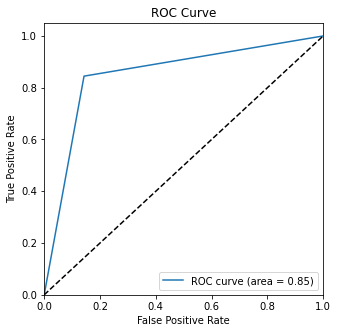

In [407]:
draw_roc(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe['Predicted_Churn'])

#### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [408]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_train_pred_rfe[i]= Y_train_pred_rfe["Churn_Prob"].map(lambda x: 1 if x > i else 0)
Y_train_pred_rfe.head()

Actual_Churn  Churn_Prob  Predicted_Churn  0.0  0.1  0.2  0.3  0.4  0.5  \
0             0    0.012051                0    1    0    0    0    0    0   
1             0    0.067063                0    1    0    0    0    0    0   
2             0    0.004503                0    1    0    0    0    0    0   
3             0    0.655879                1    1    1    1    1    1    1   
4             0    0.022087                0    1    0    0    0    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    1    0    0    0  
4    0    0    0    0

In [409]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/10 for x in range(10)]
for i in numbers[:-1]:
    cm1 = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.707299  0.980716  0.433881
0.2   0.2  0.793038  0.950391  0.635685
0.3   0.3  0.830335  0.916852  0.743818
0.4   0.4  0.847234  0.884506  0.809963
0.5   0.5  0.850967  0.844694  0.857239
0.6   0.6  0.841740  0.791405  0.892074
0.7   0.7  0.827070  0.731948  0.922192
0.8   0.8  0.802887  0.657923  0.947851


<Figure size 720x720 with 0 Axes>

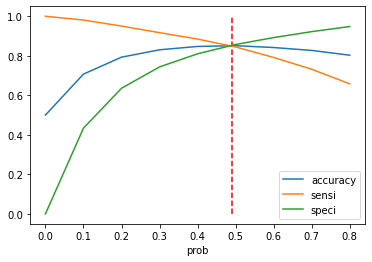

In [410]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
%matplotlib inline
plt.figure(11, figsize=(10,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.vlines(x=0.49, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

From the curve above, 0.49 seems to be the optimum point to take it as a cutoff probability.

In [411]:
# Lets predict the Y_train_pred_rfe with the probability threshold of 0.49
Y_train_pred_rfe = logReg_rfe.predict(X_train_rfe)
Y_train_pred_rfe = Y_train_pred_rfe.values.reshape(-1)
Y_train_pred_rfe = pd.DataFrame({'Actual_Churn':y_train_bal, 'Churn_Prob':Y_train_pred_rfe})
Y_train_pred_rfe['Predicted_Churn'] = Y_train_pred_rfe["Churn_Prob"].map(lambda x: 1 if x > 0.49 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe['Predicted_Churn'] )
print("Train Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_rfe["Actual_Churn"], Y_train_pred_rfe['Predicted_Churn']),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# # Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Train Confusion Matrix
 [[16450  2841]
 [ 2908 16383]] 

Overall Accuracy 0.851
Sensitivity/Recall : 0.8493
Specificity : 0.8527
Precision : 0.8522


### Hyper Parameter Tuning

Lets try few more Parameters for tuning like 
- Parameter C = 1/λ, for small values of C, we increase the regularization strength which will create simple models which underfit the data. For big values of C, we low the power of regularization which imples the model is allowed to increase it's complexity, and therefore, overfit the data.
- Penalty ['l1', 'l2'], L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

In [412]:
# Import GridSearchCV for hyper parameter tuning
from sklearn.model_selection import GridSearchCV

In [413]:
# Let's built the hyper parameters
model_logreg = LogisticRegression(random_state=100)

param_grid = {'C': [0.001,0.01,0.1,1,10,20,50,100,150,250],
              'penalty': ['l1', 'l2']}

In [414]:
# GridSearchcv

grid_search = GridSearchCV(estimator=model_logreg, 
                           param_grid=param_grid,
                           cv=4, n_jobs=-1, verbose=1, scoring='accuracy')

# We have tried 4 Fold Cross Validation Technique, 
# with n_jobs=-1 to enable parellel processing and utilize maximum available processes
# We used Scoring as accuracy here to obtain a balanced model, later we will focus only on Recall.

In [415]:
%%time

# Lets fit the GridSearchCV
grid_search.fit(X_train_bal[cols_rfe], y_train_bal)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    3.0s finished


Wall time: 3.33 s


GridSearchCV(cv=4, estimator=LogisticRegression(random_state=100), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 150, 250],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [416]:
# Let's check the best score
grid_search.best_score_

0.850137640756497

In [417]:
# Getting the best Model
logReg_gs = grid_search.best_estimator_
logReg_gs

LogisticRegression(C=1, random_state=100)

In [418]:
# Lets predict the Y_train_pred_with the probability threshold of 0.49 (same which we obtained as optimal previously)
Y_train_pred_gs = logReg_gs.predict(X_train_bal[cols_rfe])
Y_train_pred_gs = Y_train_pred_gs.reshape(-1)
Y_train_pred_gs = pd.DataFrame({'Actual_Churn':y_train_bal, 'Churn_Prob':Y_train_pred_gs})
Y_train_pred_gs['Predicted_Churn'] = Y_train_pred_gs["Churn_Prob"].map(lambda x: 1 if x > 0.49 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_train_pred_gs["Actual_Churn"], Y_train_pred_gs['Predicted_Churn'] )
print("Train Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_train_pred_gs["Actual_Churn"], Y_train_pred_gs['Predicted_Churn']),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Train Confusion Matrix
 [[16537  2754]
 [ 2996 16295]] 

Overall Accuracy 0.851
Sensitivity/Recall : 0.8447
Specificity : 0.8572
Precision : 0.8554


**Predict Test Values**

We will use both the models:
1. RFE + Logistic Regression (statsmodels) - logReg_rfe
2. HyperParamter Tuning + Logistic Regression (sklearn) - logReg_gs

**logReg_rfe**

In [419]:
# logReg_rfe

X_test_rfe = X_test[cols_rfe]
X_test_rfe.head()

roam_og_mou_8  loc_ic_t2m_mou_7  std_ic_mou_8  spl_ic_mou_8  \
45591      -0.458794          0.397398     -1.317719     -0.305449   
88300      -0.458794          1.502052     -1.317719     -0.305449   
51434       1.625758         -0.744092      1.195774     -0.305449   
81837      -0.458794         -2.069064      0.220672     -0.305449   
82750       2.267135         -0.233205     -0.237982     -0.305449   

       total_rech_num_8  total_rech_amt_6  total_rech_amt_7  max_rech_amt_6  \
45591          2.339895         -1.456944         -0.544835       -1.826075   
88300          0.860971          0.390905          0.435342       -0.118110   
51434          0.224798         -0.335320         -0.593794       -0.044059   
81837         -1.795515         -0.913169         -0.131599        0.817799   
82750          1.099081         -1.407757         -1.136866       -1.075075   

       last_day_rch_amt_8  av_rech_amt_data_8  arpu_2g_6  monthly_2g_8  \
45591           -0.108280            1.069380  -0.044769     -0.400596   
88300            0.094965            0.728671  -0.339848     -0.400596   
51434            0.676199           -1.036942  -0.080909     -0.400596   
81837           -1.429745           -1.036942   1.441217     -0.400596   
82750            0.166564            1.087717  -0.624783     -0.400596   

       monthly_3g_8  sachet_3g_8  
45591     -0.416783     3.213480  
88300     -0.416783    -0.311275  
51434     -0.416783    -0.311275  
81837     -0.416783    -0.311275  
82750     -0.416783     3.213480

In [420]:
# Lets add constant
X_test_rfe = sm.add_constant(X_test_rfe)

In [421]:
# Predict Test Values
Y_test_pred_rfe = logReg_rfe.predict(X_test_rfe)

# Converting y_pred to a dataframe since it is an array
Y_test_pred_rfe = pd.DataFrame(Y_test_pred_rfe)
Y_test_pred_rfe.columns = ["Churn_Prob"]
Y_test_pred_rfe["Actual_Churn"] = y_test
Y_test_pred_rfe['Predicted_Churn'] = Y_test_pred_rfe["Churn_Prob"].map(lambda x: 1 if x > 0.43 else 0)
Y_test_pred_rfe.head()

Churn_Prob  Actual_Churn  Predicted_Churn
45591    0.033280             0                0
88300    0.097993             0                0
51434    0.276434             0                0
81837    0.887139             0                1
82750    0.131536             0                0

Lets check the metrics

In [422]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(Y_test_pred_rfe["Actual_Churn"], Y_test_pred_rfe['Predicted_Churn']),4)

0.8254

In [423]:
# Confusion matrix 
confusion = metrics.confusion_matrix(Y_test_pred_rfe["Actual_Churn"], Y_test_pred_rfe['Predicted_Churn']) 
print("Test Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_test_pred_rfe["Actual_Churn"], Y_test_pred_rfe['Predicted_Churn']),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

Test Confusion Matrix
 [[6819 1450]
 [ 122  610]] 

Overall Accuracy 0.8254
Sensitivity/Recall : 0.8333
Specificity : 0.8246


**logReg_gs**

In [424]:
# Predicting Test values using the model obtained by Hyper Parameter tuning
Y_test_pred_gs = logReg_gs.predict(X_test[cols_rfe])
Y_test_pred_gs = Y_test_pred_gs.reshape(-1)
Y_test_pred_gs = pd.DataFrame({'Actual_Churn':y_test, 'Churn_Prob':Y_test_pred_gs})
Y_test_pred_gs['Predicted_Churn'] = Y_test_pred_gs["Churn_Prob"].map(lambda x: 1 if x > 0.43 else 0)

# Confusion matrix 
confusion = metrics.confusion_matrix(Y_test_pred_gs["Actual_Churn"], Y_test_pred_gs['Predicted_Churn'] )
print("Test Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(Y_test_pred_gs["Actual_Churn"], Y_test_pred_gs['Predicted_Churn']),2))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# # Lets check the Specificty as well
display_Specificity(confusion)

Test Confusion Matrix
 [[7078 1191]
 [ 144  588]] 

Overall Accuracy 0.85
Sensitivity/Recall : 0.8033
Specificity : 0.856


While we expected to get a better performing model after doing Hyper Parameter tuning but it was not the case for us in this Dataset.

### Decision Trees

Lets build a model using Decision Tree Classifier on both Balanced Dataset and using Weight of Class method to balance the dataset.

In [425]:
# Importing all the required Libraries
from sklearn.tree import DecisionTreeClassifier

# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

Fitting the decision tree with default hyperparameters.

In [426]:
dt_model = DecisionTreeClassifier(max_depth=5, random_state=100)
dt_model.fit(X_train_bal, y_train_bal)

DecisionTreeClassifier(max_depth=5, random_state=100)

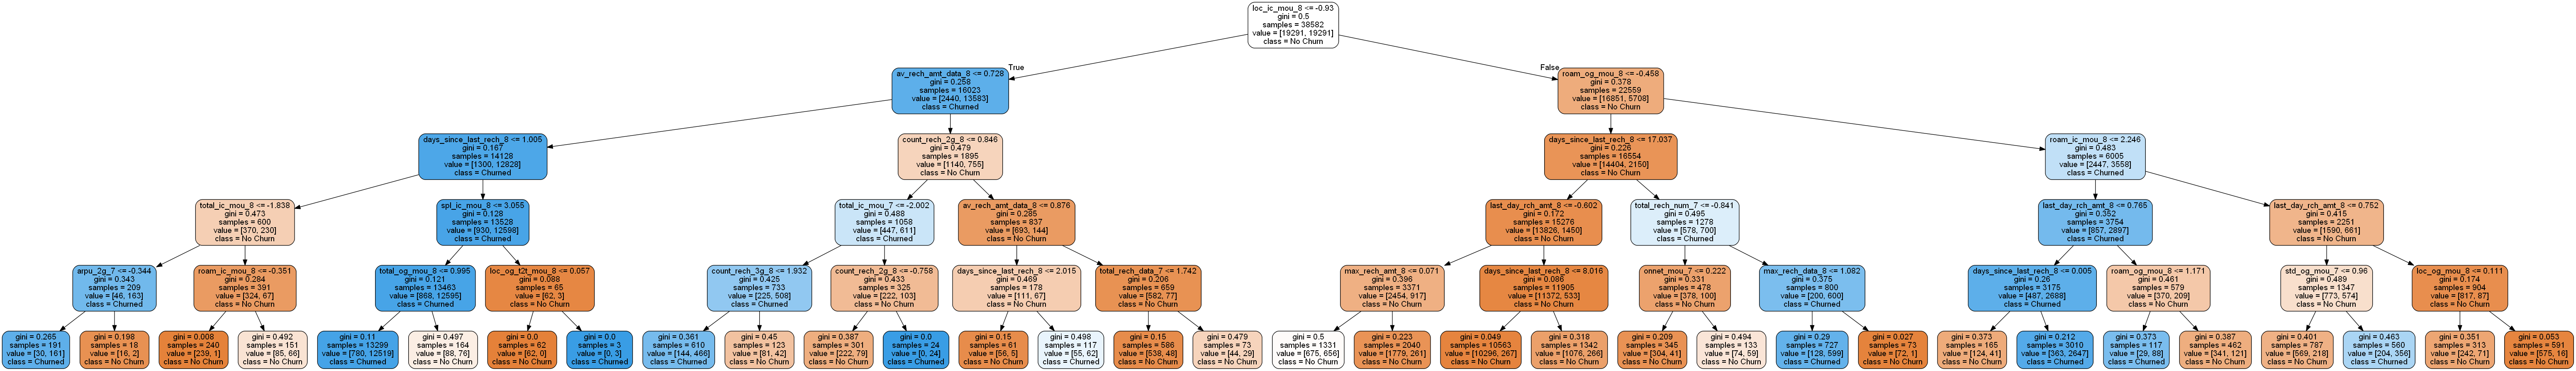

In [427]:
# plotting tree with max_depth=5
dot_data = StringIO()  

export_graphviz(dt_model, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_bal.columns,
               class_names=['No Churn', "Churned"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [428]:
# Lets evaluate the base model

y_train_pred_dt = dt_model.predict(X_train_bal)
y_test_pred_dt = dt_model.predict(X_test)

In [429]:
# Train

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_bal, y_train_pred_dt )
print("Train Confusion Matrix\n", confusion, "\n")

display_metrics(y_train_bal, y_train_pred_dt, confusion)

Train Confusion Matrix
 [[17558  1733]
 [ 2366 16925]] 

Overall Accuracy : 0.8938
Sensitivity/Recall : 0.8774
Precision : 0.9071


In [430]:
# Test

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, y_test_pred_dt )
print("Test Confusion Matrix\n", confusion, "\n")

display_metrics(y_test, y_test_pred_dt, confusion)

Test Confusion Matrix
 [[7540  729]
 [ 179  553]] 

Overall Accuracy : 0.8991
Sensitivity/Recall : 0.7555
Precision : 0.4314


We can observe that there is a sharp drop in the Test Sensitivity/Recall when checking Test Data, this is because the Dataset is not tuned through various hyper parameters.

**Hyper-Parameter Tuning**

In [431]:
# Create a model
model_dt_tuned = DecisionTreeClassifier(random_state=100)

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [i for i in range(2, 20)],
    'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5],
    "max_features": [0.3, 0.4, 0.5, 0.6],
    "min_samples_leaf": [0.05, 0.1, 0.2, 0.3, 0.4]
}

In [432]:
# Model Descision Tree(_dt) Grid Search (_gs)
# NOTE: Focus of our case study is to predict people who will churn correctly, for this we focus on Recall (sensitivity)

model_dt_gs = GridSearchCV(estimator=model_dt_tuned, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [433]:
%%time

# Fitting the model with hyper parameters
model_dt_gs.fit(X_train_bal, y_train_bal)

Fitting 4 folds for each of 1800 candidates, totalling 7200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 2426 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 4976 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 6026 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 7200 out of 7200 | elapsed:  5.7min finished


Wall time: 5min 41s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': [0.3, 0.4, 0.5, 0.6],
                         'min_samples_leaf': [0.05, 0.1, 0.2, 0.3, 0.4],
                         'min_samples_split': [0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring='recall', verbose=1)

In [434]:
# Checking the results
score_df = pd.DataFrame(model_dt_gs.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.412796      0.028946         0.024552        0.003818   
1       0.387003      0.025011         0.019964        0.003164   
2       0.422964      0.011592         0.026040        0.005628   
3       0.455327      0.037005         0.024925        0.002563   
4       0.395931      0.024079         0.024676        0.003279   

  param_max_depth param_max_features param_min_samples_leaf  \
0               2                0.3                   0.05   
1               2                0.3                   0.05   
2               2                0.3                   0.05   
3               2                0.3                   0.05   
4               2                0.3                   0.05   

  param_min_samples_split                                             params  \
0                     0.1  {'max_depth': 2, 'max_features': 0.3, 'min_sam...   
1                     0.2  {'max_depth': 2, 'max_features': 0.3, 'min_sam...   
2                     0.3  {'max_depth': 2, 'max_features': 0.3, 'min_sam...   
3                     0.4  {'max_depth': 2, 'max_features': 0.3, 'min_sam...   
4                     0.5  {'max_depth': 2, 'max_features': 0.3, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.607298           0.629484           0.628785           0.640473   
1           0.607298           0.629484           0.628785           0.640473   
2           0.607298           0.629484           0.628785           0.640473   
3           0.607298           0.629484           0.628785           0.640473   
4           0.866473           0.884926           0.885732           0.894464   

   mean_test_score  std_test_score  rank_test_score  
0         0.626510        0.012021             1780  
1         0.626510        0.012021             1780  
2         0.626510        0.012021             1780  
3         0.626510        0.012021             1780  
4         0.882899        0.010194              183

In [435]:
# Let's check the best estimator
model_dt_gs.best_estimator_

DecisionTreeClassifier(max_depth=2, max_features=0.5, min_samples_leaf=0.1,
                       min_samples_split=0.1, random_state=100)

In [436]:
# Lets save the best model
model_dt_tuned = model_dt_gs.best_estimator_

In [437]:
# Evaluation Metrics
y_train_pred_dt = model_dt_tuned.predict(X_train_bal)
y_test_pred_dt = model_dt_tuned.predict(X_test)

# Train
confusion = metrics.confusion_matrix(y_train_bal, y_train_pred_dt )
print("Train Confusion Matrix\n", confusion, "\n")
display_metrics(y_train_bal, y_train_pred_dt, confusion)

print("*"*50)

# Test
confusion = metrics.confusion_matrix(y_test, y_test_pred_dt )
print("Test Confusion Matrix\n", confusion, "\n")
display_metrics(y_test, y_test_pred_dt, confusion)

Train Confusion Matrix
 [[14404  4887]
 [ 2150 17141]] 

Overall Accuracy : 0.8176
Sensitivity/Recall : 0.8885
Precision : 0.7781
**************************************************
Test Confusion Matrix
 [[6185 2084]
 [ 121  611]] 

Overall Accuracy : 0.755
Sensitivity/Recall : 0.8347
Precision : 0.2267


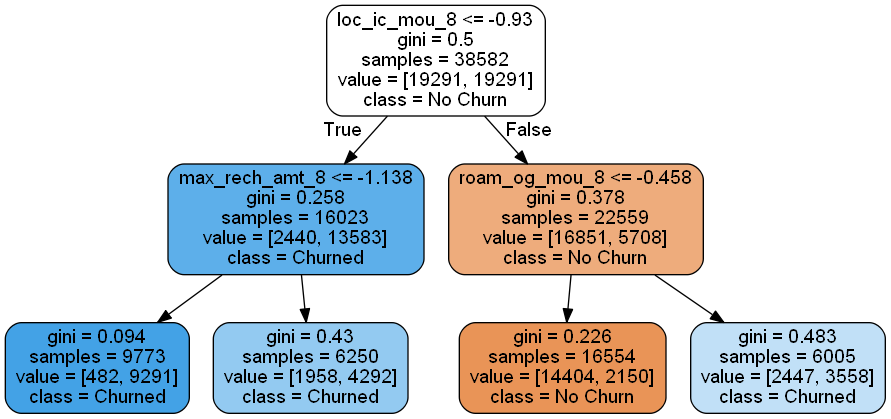

In [438]:
# Lets check the best models graph as well
dot_data = StringIO()  

export_graphviz(model_dt_tuned, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train_bal.columns,
               class_names=['No Churn', "Churned"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Model obtained from Hyper Parameter tuning incase of Decision tree performed better that the Decision tree with default parameters.

### Random Forest

In [439]:
# Lets import the libraries required

from sklearn.ensemble import RandomForestClassifier

In [440]:
# Use some default parameters to obtain the model
# Also using the defaul unbalanced datasets for Train as we will use class weight attribute

model_rf = RandomForestClassifier(random_state=100, max_depth=10, max_features=45, class_weight="balanced" )
model_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=45,
                       random_state=100)

In [441]:
# Lets check a sample tree
dot_data = StringIO()  

export_graphviz(model_rf.estimators_[4], out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns,
               class_names=['No Churn', "Churned"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [442]:
# Evaluation Metrics
y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)

# Train
confusion = metrics.confusion_matrix(y_train, y_train_pred_rf )
print("Train Confusion Matrix\n", confusion, "\n")
display_metrics(y_train, y_train_pred_rf, confusion)

print("*"*50)

# Test
confusion = metrics.confusion_matrix(y_test, y_test_pred_rf )
print("Test Confusion Matrix\n", confusion, "\n")
display_metrics(y_test, y_test_pred_rf, confusion)

Train Confusion Matrix
 [[18662   629]
 [   53  1656]] 

Overall Accuracy : 0.9675
Sensitivity/Recall : 0.969
Precision : 0.7247
**************************************************
Test Confusion Matrix
 [[7932  337]
 [ 234  498]] 

Overall Accuracy : 0.9366
Sensitivity/Recall : 0.6803
Precision : 0.5964


The score is not very good but this is expected since this is not a Tuned parameter.

Lets do **Hyper Parameter Tuning**

In [443]:
# Let's use the balanced Dataset for this Random Forest HyperParameter Tuning
# If bootstrap = False, the whole dataset is used to build each tree.
model_rf = RandomForestClassifier(random_state=100, class_weight="balanced", bootstrap=False)

# Parameters
params = {
    'max_depth': [5,6,7,8,9,10],
    'min_samples_leaf': [250,300,350],
    "min_samples_split": [500,600,700],
    'max_features': [40,45,50]
}

# Instantiate the grid search model
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1)

In [444]:
%%time

# Fitting the model
grid_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 486 out of 486 | elapsed: 18.0min finished


Wall time: 18min 12s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(bootstrap=False,
                                              class_weight='balanced',
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10],
                         'max_features': [40, 45, 50],
                         'min_samples_leaf': [250, 300, 350],
                         'min_samples_split': [500, 600, 700]},
             verbose=1)

In [445]:
# Check the best estimator

rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=5,
                       max_features=40, min_samples_leaf=250,
                       min_samples_split=500, random_state=100)

In [446]:
rf_best = grid_search_rf.best_estimator_

# Evaluation Metrics
y_train_pred_rf = rf_best.predict(X_train)
y_test_pred_rf = rf_best.predict(X_test)

# Train
confusion = metrics.confusion_matrix(y_train, y_train_pred_rf )
print("Train Confusion Matrix\n", confusion, "\n")
display_metrics(y_train, y_train_pred_rf, confusion)

print("*"*50)

# Test
confusion = metrics.confusion_matrix(y_test, y_test_pred_rf )
print("Test Confusion Matrix\n", confusion, "\n")
display_metrics(y_test, y_test_pred_rf, confusion)

Train Confusion Matrix
 [[17227  2064]
 [  281  1428]] 

Overall Accuracy : 0.8883
Sensitivity/Recall : 0.8356
Precision : 0.4089
**************************************************
Test Confusion Matrix
 [[7359  910]
 [ 142  590]] 

Overall Accuracy : 0.8831
Sensitivity/Recall : 0.806
Precision : 0.3933


We can observe that with some Hyper Parameter tuning we could achieve a better and stable result in comparison to Decision Tree where the overall accuracy of the model dropped in Test Dataset.

**NOTE**: For both Decision Tree and Random Forest we could have got better results with a different combination but due to time constrain and Computational intensive processes for both we could not explore it further.



## 2. PCA Models                         
or Principal Component Analysis is a used for dimensionality reduction. High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set.

We will use PCA for the same purpose and also to deal with multicolinearity in our dataset, though we will loose interpretebility from the final models but we will have no issue with colinearity after PCA.

We will build the following models on top of PCA
1. Logistic Regression
2. Decision Trees
3. Random Forrest

### PCA

In [447]:
# Importing the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

In [448]:
# Lets create pca object
pca = PCA(random_state=100)

In [449]:
# Lets fit the PCA with X_train_bal dataset,
pca.fit(X_train_bal)

PCA(random_state=100)

In [450]:
# Components of PCA
pca.components_

array([[ 3.38578968e-03, -3.24531373e-02, -4.79473238e-02, ...,
         6.77290297e-02,  3.38128296e-01,  9.16351382e-01],
       [-6.08774775e-02, -8.43797743e-02, -4.53367536e-02, ...,
         4.78941087e-01,  5.34098744e-01, -3.17199563e-01],
       [ 6.10623811e-02, -2.12248922e-02, -6.26240276e-02, ...,
        -5.09769274e-01,  5.88347762e-01, -2.16280895e-01],
       ...,
       [-3.24494735e-04,  4.78122199e-03, -6.55460136e-03, ...,
        -3.55870882e-04,  3.29553044e-04, -2.19721158e-04],
       [-1.15802126e-02,  8.14773791e-03,  2.16893085e-03, ...,
        -4.50792210e-05, -8.01391514e-05,  1.55540015e-05],
       [-2.04286118e-04, -5.22504754e-03,  1.18206311e-02, ...,
        -5.74749179e-05,  2.49541991e-04, -6.19010750e-06]])

In [451]:
# Let's also check the explained variance ratio for each component
pca.explained_variance_ratio_

array([5.01261835e-01, 1.00334531e-01, 6.62572072e-02, 5.66133107e-02,
       4.16521761e-02, 1.96472775e-02, 1.71470692e-02, 1.55206429e-02,
       1.08896053e-02, 1.02872243e-02, 8.79371619e-03, 6.87097666e-03,
       6.57047833e-03, 6.15972364e-03, 5.65309796e-03, 5.19033163e-03,
       4.80732491e-03, 4.51288908e-03, 4.22298946e-03, 4.08875383e-03,
       3.93046886e-03, 3.54746196e-03, 3.19974864e-03, 3.08482905e-03,
       3.06054531e-03, 2.72292285e-03, 2.67798078e-03, 2.50366025e-03,
       2.48289383e-03, 2.35402484e-03, 2.30632073e-03, 2.26439105e-03,
       2.19268989e-03, 2.15536735e-03, 2.07024538e-03, 2.00657205e-03,
       1.97680238e-03, 1.85077282e-03, 1.80525680e-03, 1.68847371e-03,
       1.63964722e-03, 1.61156430e-03, 1.56080290e-03, 1.51955433e-03,
       1.46529025e-03, 1.44093320e-03, 1.40401092e-03, 1.39581875e-03,
       1.34860781e-03, 1.27356213e-03, 1.26138166e-03, 1.22976589e-03,
       1.20175979e-03, 1.19251628e-03, 1.16976780e-03, 1.15871282e-03,
      

So we can intrepet much from the above details, lets plot this on a scree plot and then check the optimal number of components

In [452]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

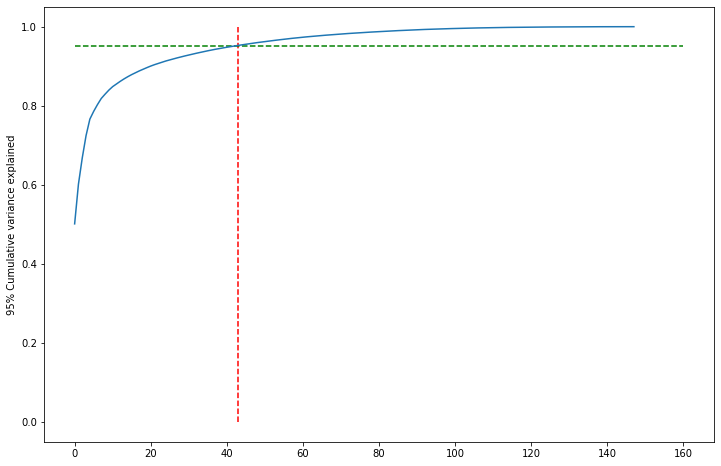

In [453]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=43, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=160, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("95% Cumulative variance explained")
plt.show()

So 43 Components explain 95% of the variance in the data, so now we will perform PCA with 43 components

In [454]:
# PCA with 43 Components
pca_n43 = IncrementalPCA(n_components=43)

# Create X_train and X_test
X_train_pca = pca_n43.fit_transform(X_train_bal)
X_test_pca = pca_n43.transform(X_test)

#### Logistic Regression on PCA

In [455]:
# Logistic Regression Model
logReg_pca = LogisticRegression(random_state=100)

In [456]:
# Using pca_n65
logReg_pca = logReg_pca.fit(X_train_pca, y_train_bal)

In [457]:
# Metrics for Train
Y_train_pred_pca_lr = logReg_pca.predict(X_train_pca)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_bal, Y_train_pred_pca_lr )
print("Train Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(y_train_bal, Y_train_pred_pca_lr),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Train Confusion Matrix
 [[16945  2346]
 [ 2745 16546]] 

Overall Accuracy 0.868
Sensitivity/Recall : 0.8577
Specificity : 0.8784
Precision : 0.8758


In [458]:
#  Lets predict the test Dataset and check the metrics
Y_test_pred_pca_lr = logReg_pca.predict(X_test_pca)

In [459]:
# Metrics for test
Y_test_pred_pca_lr = logReg_pca.predict(X_test_pca)

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, Y_test_pred_pca_lr )
print("Test Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(y_test, Y_test_pred_pca_lr),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Test Confusion Matrix
 [[7260 1009]
 [ 138  594]] 

Overall Accuracy 0.8726
Sensitivity/Recall : 0.8115
Specificity : 0.878
Precision : 0.3706


Earlier we create the model after we used Balancing technique SMOTE to balance the classes in Churn variable, now lets also try to create a model in Logistic Regression using "Weight of Class" technique instead of creating synthetic values.

**Logistic Regression on PCA** - using Weight of Class + Hyper Parameter Tuning

In [460]:
# PCA with 43 Components
pca_n43 = IncrementalPCA(n_components=43)

X_train_pca_2 = pca_n43.fit_transform(X_train)
X_test_pca_2 = pca_n43.transform(X_test)

In [461]:
# Let's built the hyper parameters
model_logreg = LogisticRegression(random_state=100, class_weight="balanced")

param_grid = {'C': [0.001,0.01,0.1,1,10,20,50,100,150,250],
              'penalty': ['l1', 'l2']}

In [462]:
# GridSearchcv

grid_search = GridSearchCV(estimator=model_logreg, 
                           param_grid=param_grid,
                           cv=4, n_jobs=1, verbose=1, scoring='recall')

In [463]:
%%time
grid_search.fit(X_train_pca_2, y_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Wall time: 2.18 s


[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.0s finished


GridSearchCV(cv=4,
             estimator=LogisticRegression(class_weight='balanced',
                                          random_state=100),
             n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 20, 50, 100, 150, 250],
                         'penalty': ['l1', 'l2']},
             scoring='recall', verbose=1)

In [464]:
# Let's check the best score
grid_search.best_score_

0.8232889754645538

In [465]:
# Getting the best Model
logReg_gs_pca = grid_search.best_estimator_
logReg_gs_pca

LogisticRegression(C=0.1, class_weight='balanced', random_state=100)

In [466]:
# Lets predict the train Dataset and check the metrics
Y_train_pred_pca_L = logReg_gs_pca.predict(X_train_pca_2)

In [467]:
# Metrics for Train

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train, Y_train_pred_pca_L )
print("Train Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(y_train, Y_train_pred_pca_L),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Train Confusion Matrix
 [[16843  2448]
 [  291  1418]] 

Overall Accuracy 0.8696
Sensitivity/Recall : 0.8297
Specificity : 0.8731
Precision : 0.3668


In [468]:
#  Lets predict the test Dataset and check the metrics
Y_test_pred_pca_L = logReg_gs_pca.predict(X_test_pca_2)

In [469]:
# Metrics for Test

# Confusion matrix 
confusion = metrics.confusion_matrix(y_test, Y_test_pred_pca_L )
print("Test Confusion Matrix\n", confusion, "\n")

# Let's check the overall accuracy.
print("Overall Accuracy", round(metrics.accuracy_score(y_test, Y_test_pred_pca_L),4))

# Lets check the Sensitivity as well
display_Sensitivity(confusion)

# Lets check the Specificty as well
display_Specificity(confusion)

display_precision(confusion)

Test Confusion Matrix
 [[7191 1078]
 [ 130  602]] 

Overall Accuracy 0.8658
Sensitivity/Recall : 0.8224
Specificity : 0.8696
Precision : 0.3583


### Decision Trees

We have already seen Decision Trees with Default parameters, hence we will directly do Hyper Parameter tuning with PCA.

Also, we will use Class_Weight parameter to balance out the imbalance in the Churn variable instead of using synthetic datapoints using SMOTE.

In [470]:
# Create a model
pca_dt_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [i for i in range(2, 10)],
    'min_samples_leaf': [i for i in range(5, 100, 5)],
    'max_features': [0.2, 0.25, 0.3, 0.35, 0.4],
    'criterion': ["gini", "entropy"]
}

In [471]:
# Model PCA Descision Tree(_dt) Grid Search (_gs)
# NOTE: Focus of our case study is to predict people who will churn correctly, for this we focus on Recall (sensitivity)

pca_model_dt_gs = GridSearchCV(estimator=pca_dt_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

In [472]:
%%time

pca_model_dt_gs.fit(X_train_pca_2, y_train)

Fitting 4 folds for each of 1520 candidates, totalling 6080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1584 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 2492 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 2942 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done 3876 tasks      | elapsed:   54.6s
[Parallel(n_jobs=-1)]: Done 5176 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 6057 out of 6080 | elapsed:  1.9min remaining:    0.3s


Wall time: 1min 53s


[Parallel(n_jobs=-1)]: Done 6080 out of 6080 | elapsed:  1.9min finished


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [0.2, 0.25, 0.3, 0.35, 0.4],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35, 40, 45,
                                              50, 55, 60, 65, 70, 75, 80, 85,
                                              90, 95]},
             scoring='recall', verbose=1)

In [473]:
score_df = pd.DataFrame(pca_model_dt_gs.cv_results_)
score_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.054684      0.001767         0.004092        0.000215   
1       0.057412      0.011329         0.004216        0.000554   
2       0.057660      0.005670         0.003844        0.000411   
3       0.064602      0.014011         0.004092        0.000411   
4       0.055428      0.001503         0.005332        0.000734   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini               2                0.2                      5   
1            gini               2                0.2                     10   
2            gini               2                0.2                     15   
3            gini               2                0.2                     20   
4            gini               2                0.2                     25   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.831382   
1  {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.831382   
2  {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.831382   
3  {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.831382   
4  {'criterion': 'gini', 'max_depth': 2, 'max_fea...           0.831382   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0           0.733021           0.775176           0.752336         0.772979   
1           0.733021           0.775176           0.752336         0.772979   
2           0.733021           0.775176           0.752336         0.772979   
3           0.733021           0.775176           0.752336         0.772979   
4           0.733021           0.775176           0.752336         0.772979   

   std_test_score  rank_test_score  
0        0.036873              209  
1        0.036873              209  
2        0.036873              209  
3        0.036873              209  
4        0.036873              209

In [474]:
# Let's check the best estimator

pca_model_dt_gs.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_features=0.3,
                       min_samples_leaf=5, random_state=42)

In [475]:
# Lets save the best model
pca_dt_model = pca_model_dt_gs.best_estimator_

In [476]:
# Evaluation Metrics
y_train_pred_dt_pca = pca_dt_model.predict(X_train_pca_2)
y_test_pred_dt_pca = pca_dt_model.predict(X_test_pca_2)

# Train
confusion = metrics.confusion_matrix(y_train, y_train_pred_dt_pca )
print("Train Confusion Matrix\n", confusion, "\n")
display_metrics(y_train, y_train_pred_dt_pca, confusion)

print("*"*50)

# Test
confusion = metrics.confusion_matrix(y_test, y_test_pred_dt_pca )
print("Test Confusion Matrix\n", confusion, "\n")
display_metrics(y_test, y_test_pred_dt_pca, confusion)

Train Confusion Matrix
 [[10094  9197]
 [  215  1494]] 

Overall Accuracy : 0.5518
Sensitivity/Recall : 0.8742
Precision : 0.1397
**************************************************
Test Confusion Matrix
 [[4389 3880]
 [ 100  632]] 

Overall Accuracy : 0.5578
Sensitivity/Recall : 0.8634
Precision : 0.1401


So PCA + Decision Tree though provided better performance for models and had a decent Recall score but the overall accuracy of the model is not very high.

Again this is due to us choosing Recall as the scoring technique, if we choose "f1" then the accuracy will increase but the Recall will fall.

### Random Forest

In [477]:
# Let's use the balanced Dataset for this Random Forest HyperParameter Tuning
pca_model_rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Parameters
params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [0.0025, 0.05, 0.075, 0.1, 0.2],
    "min_samples_split": [0.1, 0.15, 0.2, 0.25, 0.3],
    'max_features': [0.15, 0.2, 0.25, "auto", "log2"]
}

# Instantiate the grid search model
grid_search_rf_pca = GridSearchCV(estimator=pca_model_rf, param_grid=params, 
                          cv=3, n_jobs=-1, verbose=1, scoring = "recall")

In [478]:
%%time

# Fitting the model
grid_search_rf_pca.fit(X_train_pca_2, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  5.9min finished


Wall time: 5min 56s


GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.15, 0.2, 0.25, 'auto', 'log2'],
                         'min_samples_leaf': [0.0025, 0.05, 0.075, 0.1, 0.2],
                         'min_samples_split': [0.1, 0.15, 0.2, 0.25, 0.3]},
             scoring='recall', verbose=1)

In [479]:
# Check the best estimator
grid_search_rf_pca.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=0.25,
                       min_samples_leaf=0.0025, min_samples_split=0.2,
                       random_state=42)

In [480]:
rf_best_pca = grid_search_rf_pca.best_estimator_

# Evaluation Metrics
y_train_pred_rf_pca = rf_best_pca.predict(X_train_pca_2)
y_test_pred_rf_pca = rf_best_pca.predict(X_test_pca_2)

# Train
confusion = metrics.confusion_matrix(y_train, y_train_pred_rf_pca )
print("Train Confusion Matrix\n", confusion, "\n")
display_metrics(y_train, y_train_pred_rf_pca, confusion)

print("*"*50)

# Test
confusion = metrics.confusion_matrix(y_test, y_test_pred_rf_pca )
print("Test Confusion Matrix\n", confusion, "\n")
display_metrics(y_test, y_test_pred_rf_pca, confusion)

Train Confusion Matrix
 [[15430  3861]
 [  289  1420]] 

Overall Accuracy : 0.8024
Sensitivity/Recall : 0.8309
Precision : 0.2689
**************************************************
Test Confusion Matrix
 [[6595 1674]
 [ 132  600]] 

Overall Accuracy : 0.7994
Sensitivity/Recall : 0.8197
Precision : 0.2639


## `Conclusion`:                        

For this case study we built in total 6 models, explained as followed
1. Interpretable Models
2. PCA Models

in both these above approaches we built the 3 models each, these models were
1. Logistic Regression
2. Decision Tree
3. Random Forest

### Recommendation on Model-usage:

Based upon the model usage and the business stategy we can have 3 seperate approaches for recommendation,


1. **Focus is Interpretation**: If the Business wants to understand what are the key parameters which they need to focus upon to reduce the churn rate then we will go with the `Logistic Regression model we obtained in the Interpretable Models`. 
    Since it had the best overall accurary and Recall compared to Random Forest and Decision Trees in Interpretable models.

    Metrics: 
        - Train: Accuracy - 0.851 & Recall - 0.8447
        - Test: Accuracy - 0.8254 & Recall - 0.8333

    Below are the features used to build the model


In [481]:
# Removing const from the below list
logReg_rfe.params[1:]

roam_og_mou_8         0.680201
loc_ic_t2m_mou_7     -0.466060
std_ic_mou_8         -0.621556
spl_ic_mou_8         -0.429243
total_rech_num_8     -0.753028
total_rech_amt_6      0.431843
total_rech_amt_7      0.324998
max_rech_amt_6       -0.464505
last_day_rch_amt_8   -0.828728
av_rech_amt_data_8   -0.545613
arpu_2g_6             0.296587
monthly_2g_8         -0.345111
monthly_3g_8         -0.181583
sachet_3g_8          -0.084340
dtype: float64

Above we have the list of all the parameters which we finally obtained after the logistic Regression model was built.

The Random Forest also provided a stable score here but since we were not able to explore it in depth to much hence the Random Forest Model is not the most optimised one.
- Train - Accuracy: 0.8883 and Recall: 0.8356
- Test - Accuracy: 0.8831 and Recall : 0.806

Hence we opted Logistic Regression as the Final Interpretable Model.


2. **If RECALL is priority**: If business is solely focused upon the final results of the model and does not want to know the underlying working or the paramters responsible for achieving the results then we can `opt for Decision Tree model after PCA`.                    
    Metrics:
        - Train - Accuracy: 0.5518 but Recall: 0.8742
        - Test - Accuracy: 0.5578 but Recall: 0.8634
        
    Even though this Decision Tree has a very high Recall the overall accuracy model is not very high.
    

3. **If Recall and Accuracy, both are priority** and Business is not focused upon interpretation then `Logistic Regression with PCA is the best Model`.
    Metrics:
        - Train - Accuracy: 0.8696 but Recall: 0.8297
        - Test - Accuracy: 0.8658 but Recall: 0.8224
        
    Even Random Forest in Interpretable Models could have been used here but Logistic Regression slightly performes better.
    
    
### Recommendation for Business Strategy:                              
Based upon Logistic Regression of Interpretable Models.

Below is the calculation for the Odds Ratio of each of the variables obtained in Logistic Model.              
Refernce: [Interpreting the Impact Size of Logistic Regression Coefficients](https://medium.com/ro-data-team-blog/interpret-the-impact-size-with-logistic-regression-coefficients-5eec21baaac8)

In [482]:
final_params = pd.DataFrame(logReg_rfe.params[1:], columns=["coefficient"])
final_params["Odds-Ratio"] = np.exp(final_params["coefficient"])
final_params["Odds-Ratio"] = np.abs(1- final_params["Odds-Ratio"])
final_params["Odds-Ratio%"] = round(final_params["Odds-Ratio"]*100,2)
final_params.sort_values(by="Odds-Ratio", ascending=False)

coefficient  Odds-Ratio  Odds-Ratio%
roam_og_mou_8          0.680201    0.974274        97.43
last_day_rch_amt_8    -0.828728    0.563396        56.34
total_rech_amt_6       0.431843    0.540093        54.01
total_rech_num_8      -0.753028    0.529061        52.91
std_ic_mou_8          -0.621556    0.462892        46.29
av_rech_amt_data_8    -0.545613    0.420514        42.05
total_rech_amt_7       0.324998    0.384028        38.40
loc_ic_t2m_mou_7      -0.466060    0.372530        37.25
max_rech_amt_6        -0.464505    0.371554        37.16
spl_ic_mou_8          -0.429243    0.348998        34.90
arpu_2g_6              0.296587    0.345259        34.53
monthly_2g_8          -0.345111    0.291858        29.19
monthly_3g_8          -0.181583    0.166051        16.61
sachet_3g_8           -0.084340    0.080881         8.09

`Suggestion`:                       
For every unit increase of below features individually (while keeping the rest of the feature constant), the odds of the customer churning increases/decreases as follows
- roam_og_mou_8: Increases by 97%
- total_rech_amt_6: Increases by 54%
- total_rech_num_8: Decreases by 53%
- av_rech_amt_data_8: Decreases by 42%
- arpu_2g_6: Increase by 35%
- monthly_2g_8: Decrease by 29%
- monthly_3g_8: Decrease by 17%

Based upon the above information the business can consider the below recommendations to reduce churn:
1. Most of the churn customers make high frequency of outgoing calls on roaming and it might be resulting in higher tarrif for the customer. Hence the Company can offer special packs or discounts so that customer can make more number of roaming calls or cheaper roaming calls. If high number of roaming calls are viewed in customer dataset to reduce the chances of churn.
2. Identify and Incentivize customers with value/combo packs who have have lower amount per recharge or lower number of recharges in general specially if the pattern is same for last few months.
3. Shift dependencies of revenue from 2G to 3G by decreasing the customer expenditure on 2G Data services and increase their incentives to subscribe for 2G/3G monthly packs. This would reduce the odds of the customer churning from the network.